# Clustering Assignment
by **Sai Vamsy Dhulipala**

## Problem Statement 

**HELP International is an international humanitarian NGO** that is committed to **fighting poverty and providing the people of backward countries with basic amenities and relief** during the time of disasters and natural calamities.

After the **recent funding programmes, they have been able to raise around $ 10 million**. Now the **CEO of the NGO needs to decide how to use this money strategically and effectively.** The significant issues that come while making this decision are mostly related to **choosing the countries that are in the direst need of aid.**

The **objective is to categorise the countries** using the given socio-economic and health factors that determine the overall development of the country. Then, to **suggest the countries which the CEO needs to focus on the most.**

## Data Preperation

### Importing libraries

**Importing libraries for data analysis**

In [1]:
import numpy as np
from numpy.random import uniform
import pandas as pd
from random import sample
from math import isnan

pd.set_option("display.max_columns",50,"display.max_colwidth",50)

**Importing libraries for data visualisation**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

**Importing libraries for machine learning**

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

**Suppressing warnings**

In [5]:
from warnings import filterwarnings
filterwarnings("ignore")

### Importing and inspecting the dataset

**Importing the dataset**

In [6]:
data = pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**Understanding the shape and structure**

In [7]:
data.shape

(167, 10)

In [8]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 22.5 KB


**<span style = "color:green">We find that no columns have missing values present. Hence, there is no need for futher imputation.</span>**

**Understanding the data dictionary**

In [9]:
data_dict = pd.read_csv("data-dictionary+.csv")
for i in data_dict.index:
    col = data_dict["Column Name"].iloc[i]
    desc = data_dict["Description"].iloc[i]
    print(f"{col}: {desc}",end="\n\n")

country: Name of the country

child_mort: Death of children under 5 years of age per 1000 live births

exports: Exports of goods and services per capita. Given as %age of the GDP per capita

health: Total health spending per capita. Given as %age of GDP per capita

imports: Imports of goods and services per capita. Given as %age of the GDP per capita

Income: Net income per person

Inflation: The measurement of the annual growth rate of the Total GDP

life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same

total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.

gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.



## Exploratory Data Analysis

### Univariate Analysis

**1. `GDP per Capita`**

**Understanding the spread of values**

In [10]:
data["gdpp"].describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

**Creating Boxplot**

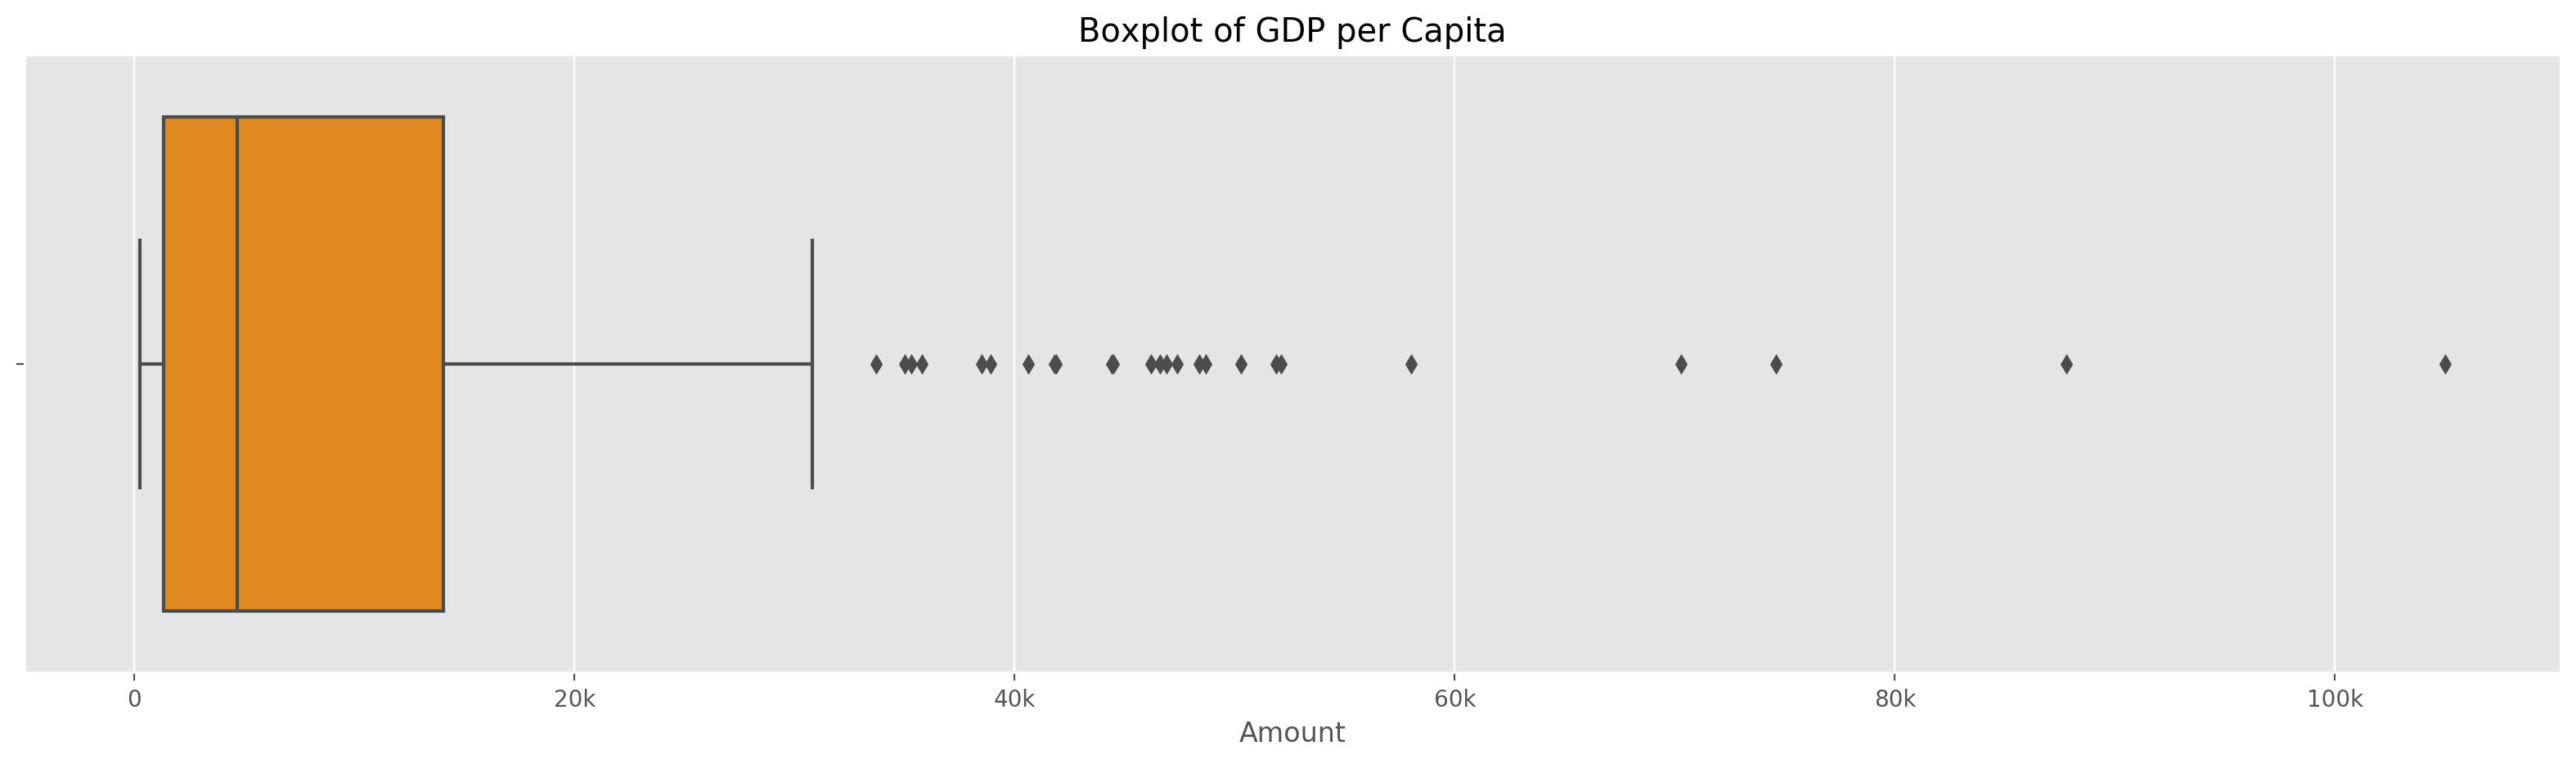

In [11]:
fig,ax = plt.subplots(figsize=(20,5),dpi=200)

gdpp = data["gdpp"].values
sns.boxplot(gdpp,color="darkorange")

ax.set_title("Boxplot of GDP per Capita")
ax.set_xlabel("Amount")
ax.set_xticklabels(["-20k","0","20k","40k","60k","80k","100k","120k"])

fig.show()

**<span style = "color:green">We understand from the boxplot and the 5-point summary that the GDP per Capita is spread between 200 and 36,000; around 50% of the data points lie between 1,300 to 14,000 with the median GDP being around 4,600. Also, there are numerous outliers existing towards the upper end, but since these points are the actual figures of GDP per Capita in certain highly developed countries, it is preferred not to impute those particular data points as they would be clustered into a seperate cluster altogether.</span>**

**2. `Net Income per Person`**

**Understanding the spread of values**

In [12]:
data["income"].describe()

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64

**Creating Boxplot**

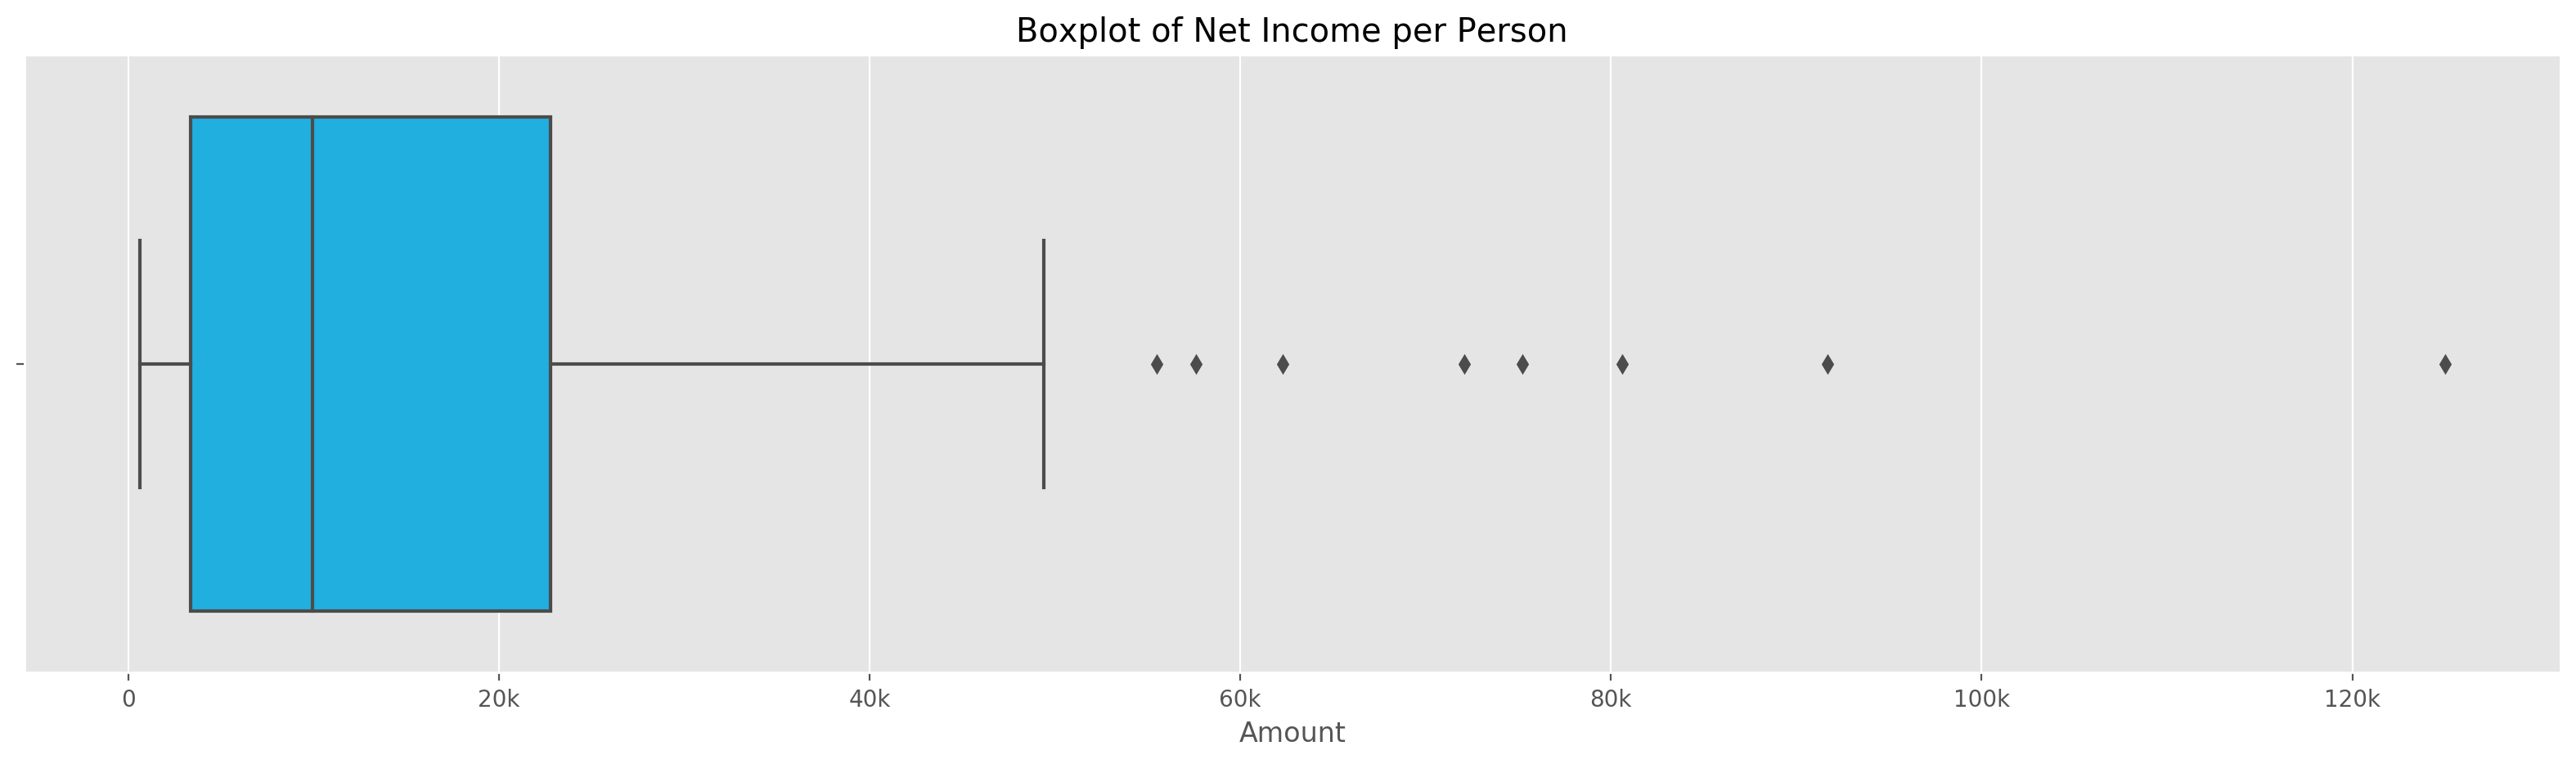

In [13]:
fig,ax = plt.subplots(figsize=(20,5),dpi=200)

inc = data["income"].values
sns.boxplot(inc,color="deepskyblue")

ax.set_title("Boxplot of Net Income per Person")
ax.set_xlabel("Amount")
ax.set_xticklabels(["-20k","0","20k","40k","60k","80k","100k","120k"])

fig.show()

**Note that the boxplot has been created on a logarithmic scale due to huge spread between the values.**

**<span style = "color:green">We understand from the boxplot and the 5-point summary that the Net Income per Person is spread between 600 and 50,000; around 50% of the data points lie between 3,300 to 23,000 with the median income being around 10,000. Also, there are a few outliers exisiting towards the upper end, but since these points are the actual figures of Net Income per Person in certain highly developed countries, it is preferred not to impute those particular data points as they would be clustered into a seperate cluster altogether</span>**

**3. `Child Mortality Rate`**

**Understanding the spread of values**

In [14]:
data["child_mort"].describe()

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

**Creating Boxplot**

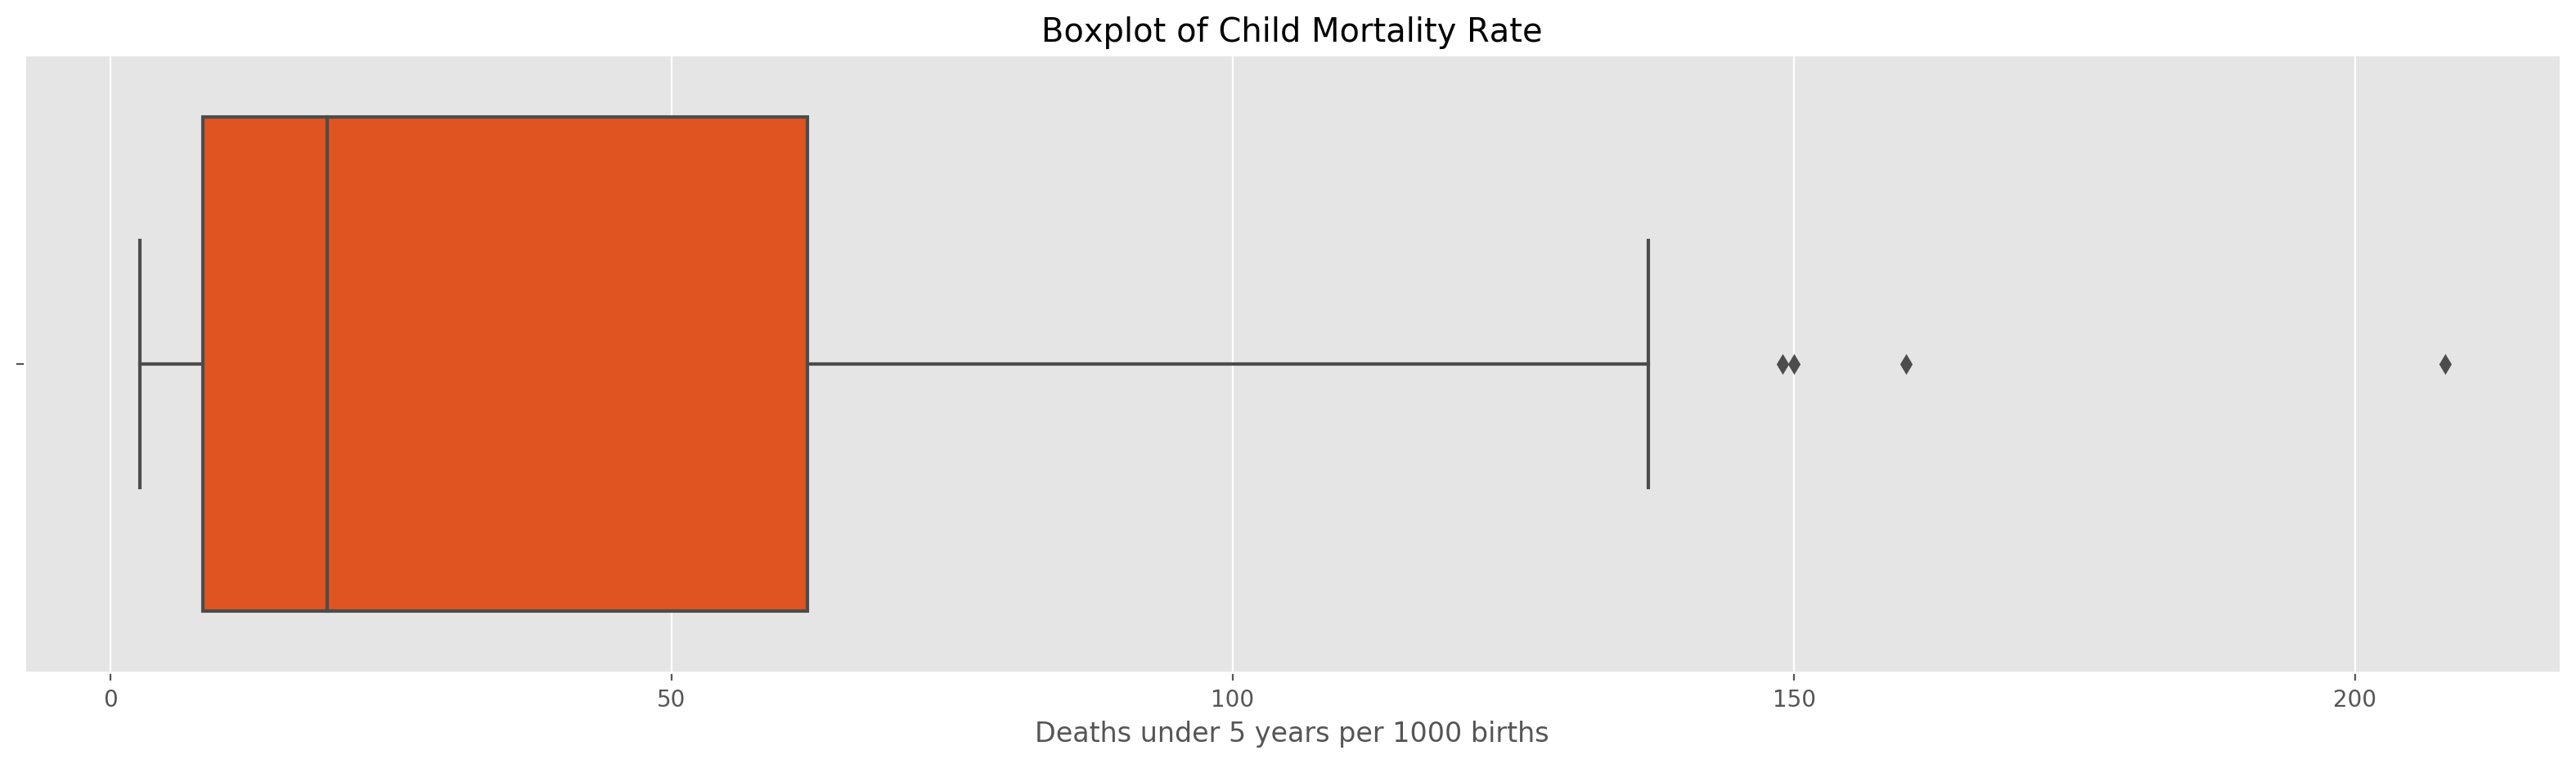

In [15]:
fig,ax = plt.subplots(figsize=(20,5),dpi=200)

mort = data["child_mort"].values
sns.boxplot(mort,color="orangered")

ax.set_title("Boxplot of Child Mortality Rate")
ax.set_xlabel("Deaths under 5 years per 1000 births")

fig.show()

**<span style = "color:green">We understand from the boxplot and the 5-point summary that the Child Mortality Rate is spread between 2 and 135, around 50% of the data points lie between 8 to 62 with the median mortality rate being around 19. Also, there are a few outliers exisiting towards the upper end, but since these points reflect the extermities of child mortalities in those particular countries, there is no need for imputing the outliers.</span>**

**4. `Inflation`**

**Understanding the spread of values**

In [16]:
data["inflation"].describe()

count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
max      104.000000
Name: inflation, dtype: float64

**Creating Boxplot**

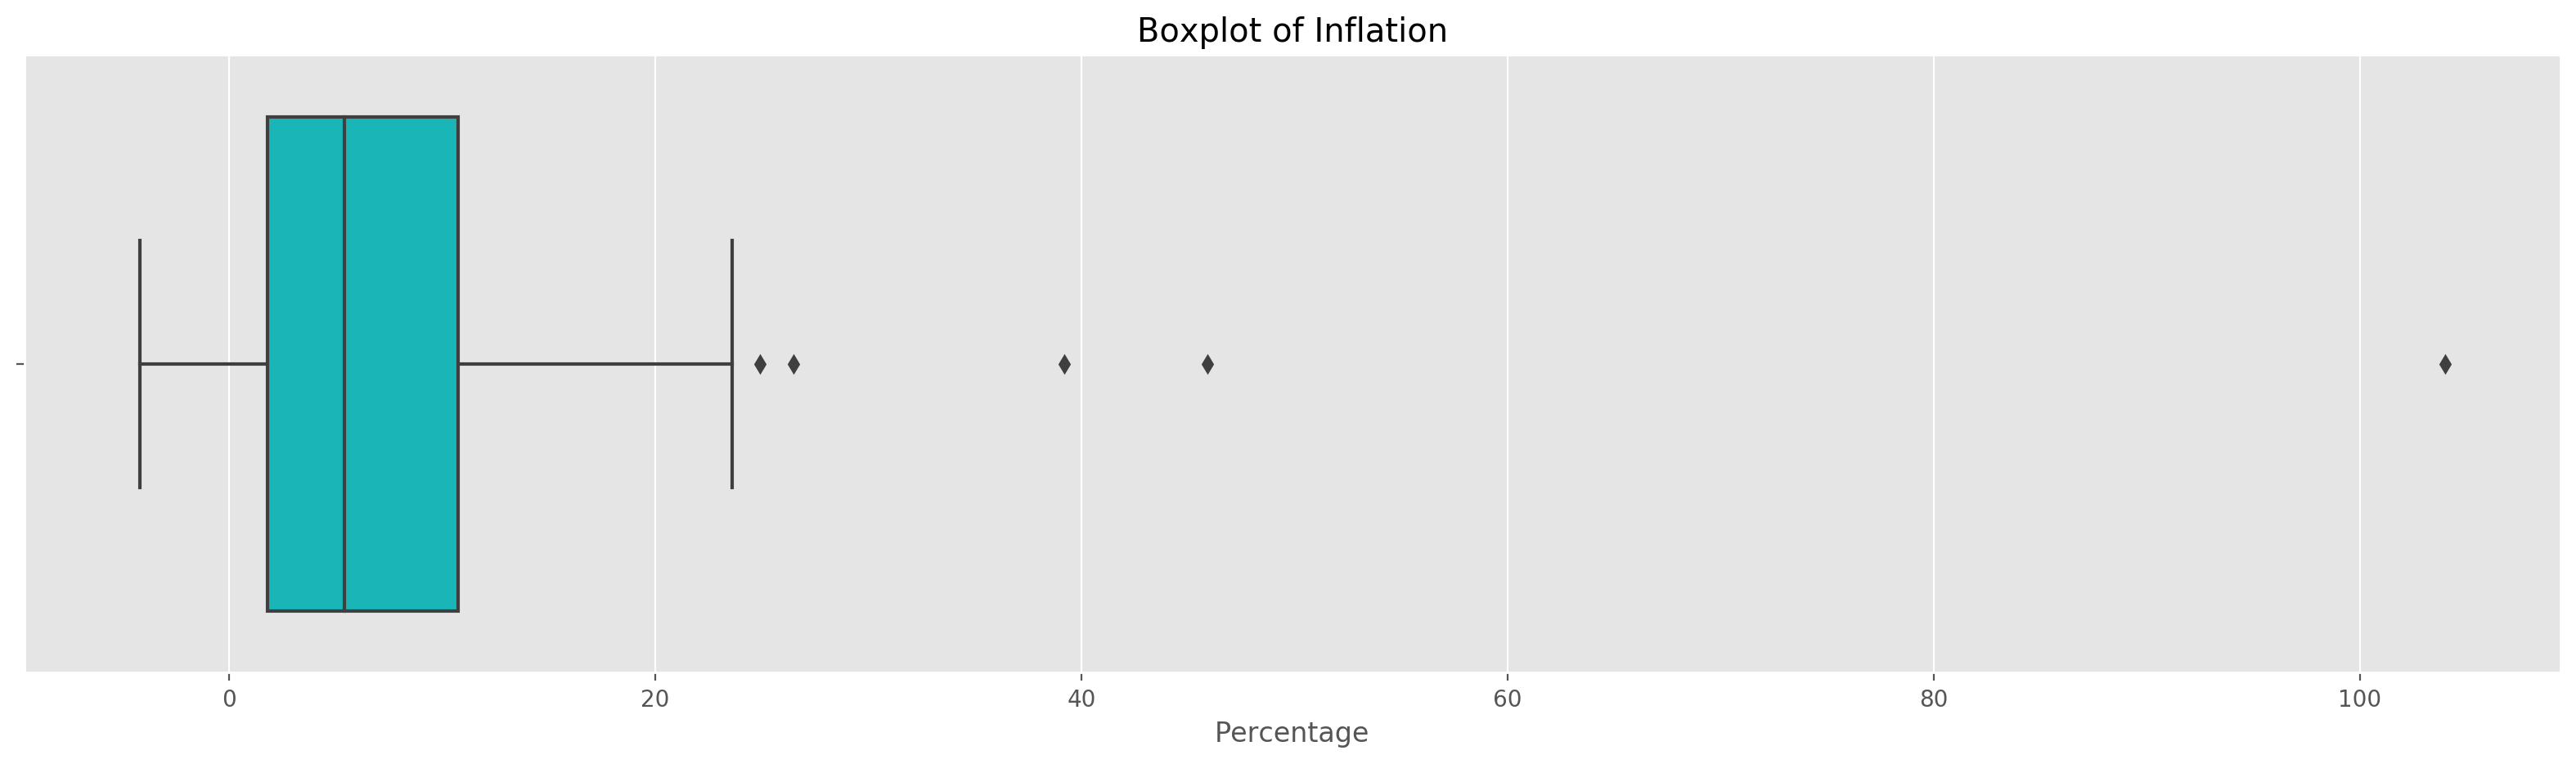

In [17]:
fig,ax = plt.subplots(figsize=(20,5),dpi=200)

mort = data["inflation"].values
sns.boxplot(mort,color="darkturquoise")

ax.set_title("Boxplot of Inflation")
ax.set_xlabel("Percentage")

fig.show()

**<span style = "color:green">We understand from the boxplot and the 5-point summary that Inflation is spread between -4% and 25%, around 50% of the data points lie between 1.8% to 10.8% with the median being around 5.4%. Also, there are a few outliers exisiting towards the upper end, but since these points reflect the extermities of inflation in those particular countries, there is no need for imputing the outliers.</span>**

### Bivariate Analysis

**1. `GDP per Capita Vs Net Income`**

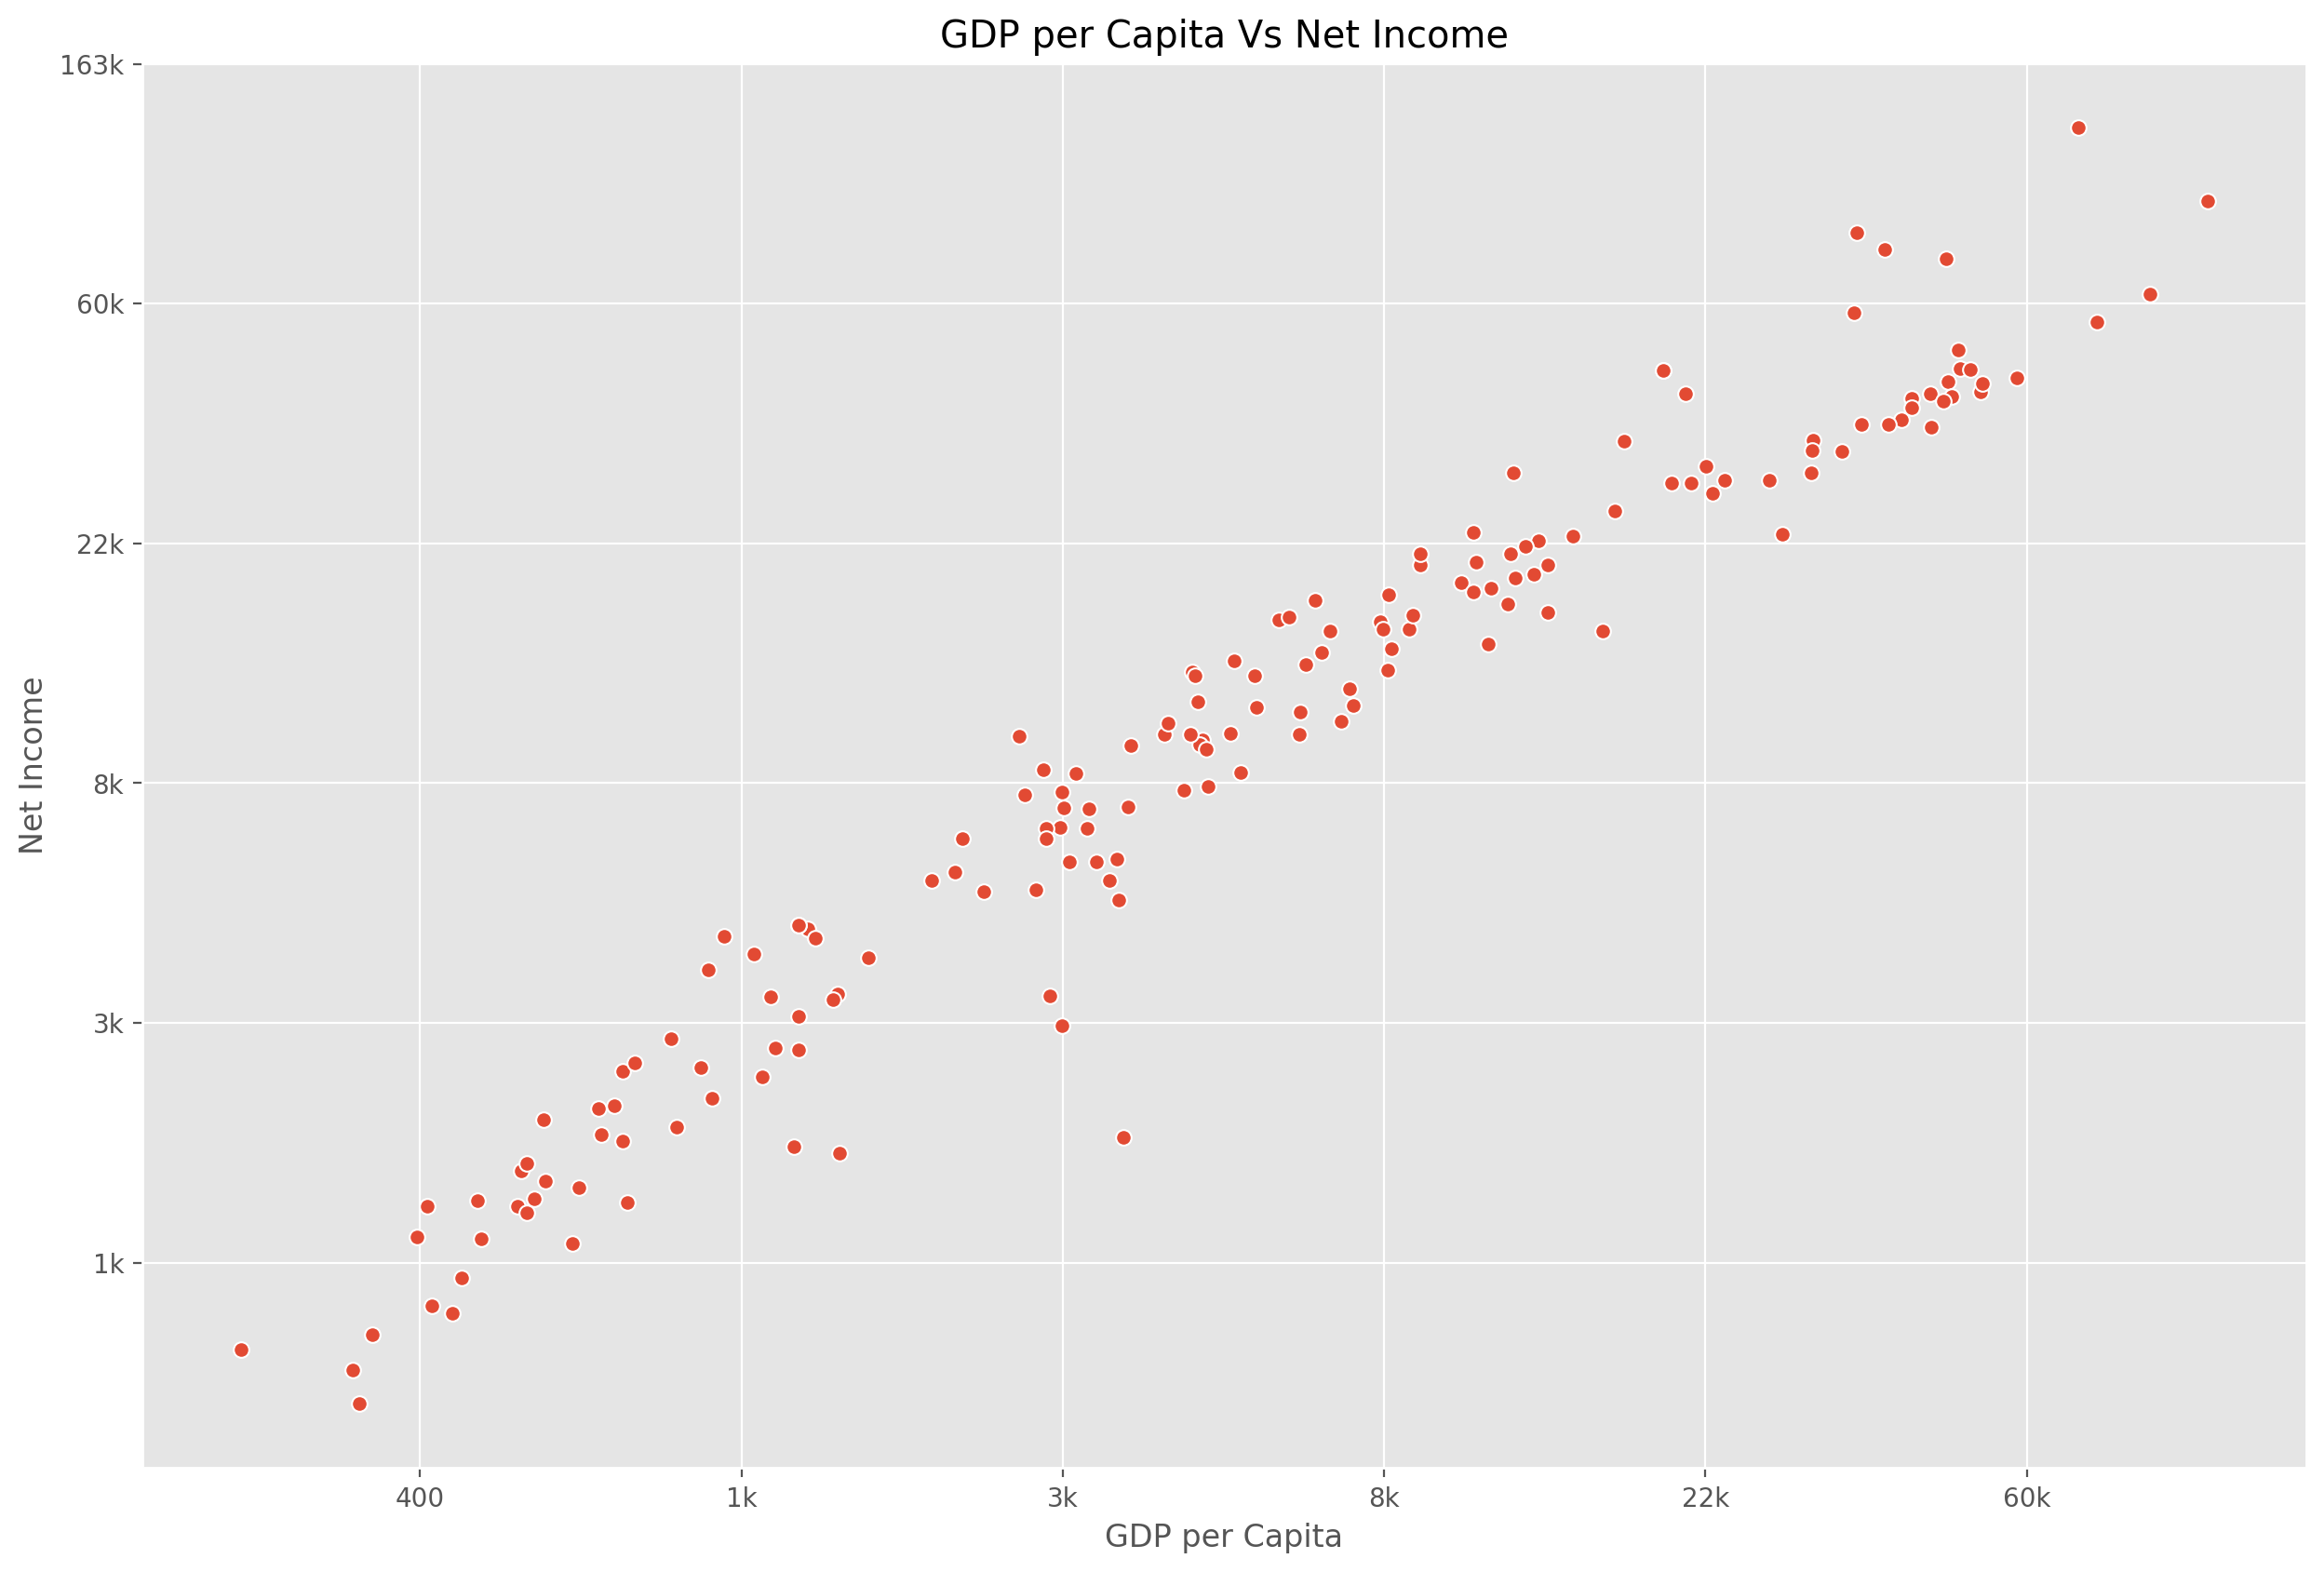

In [18]:
fig,ax = plt.subplots(figsize=(15,10),dpi=200)

gdpp = np.log(data["gdpp"].values)
inc = np.log(data["income"].values)
sns.scatterplot(x=gdpp,y=inc)

ax.set_title("GDP per Capita Vs Net Income")
ax.set_xlabel("GDP per Capita")
ax.set_ylabel("Net Income")

ax.set_xticklabels(["150","400","1k","3k","8k","22k","60k","163k"])
ax.set_yticklabels(["400","1k","3k","8k","22k","60k","163k","442k"])

fig.show()

**Note that the scatterplot has been created on a logarithmic scale due to huge spread between the values.**

**<span style = "color:green">We can infer from the above scatterplot that GDP Per Capita and Net Income have very high magnitude of positive correlation.</span>**

**2. `GDP per Capita Vs Child Mortality Rate`**

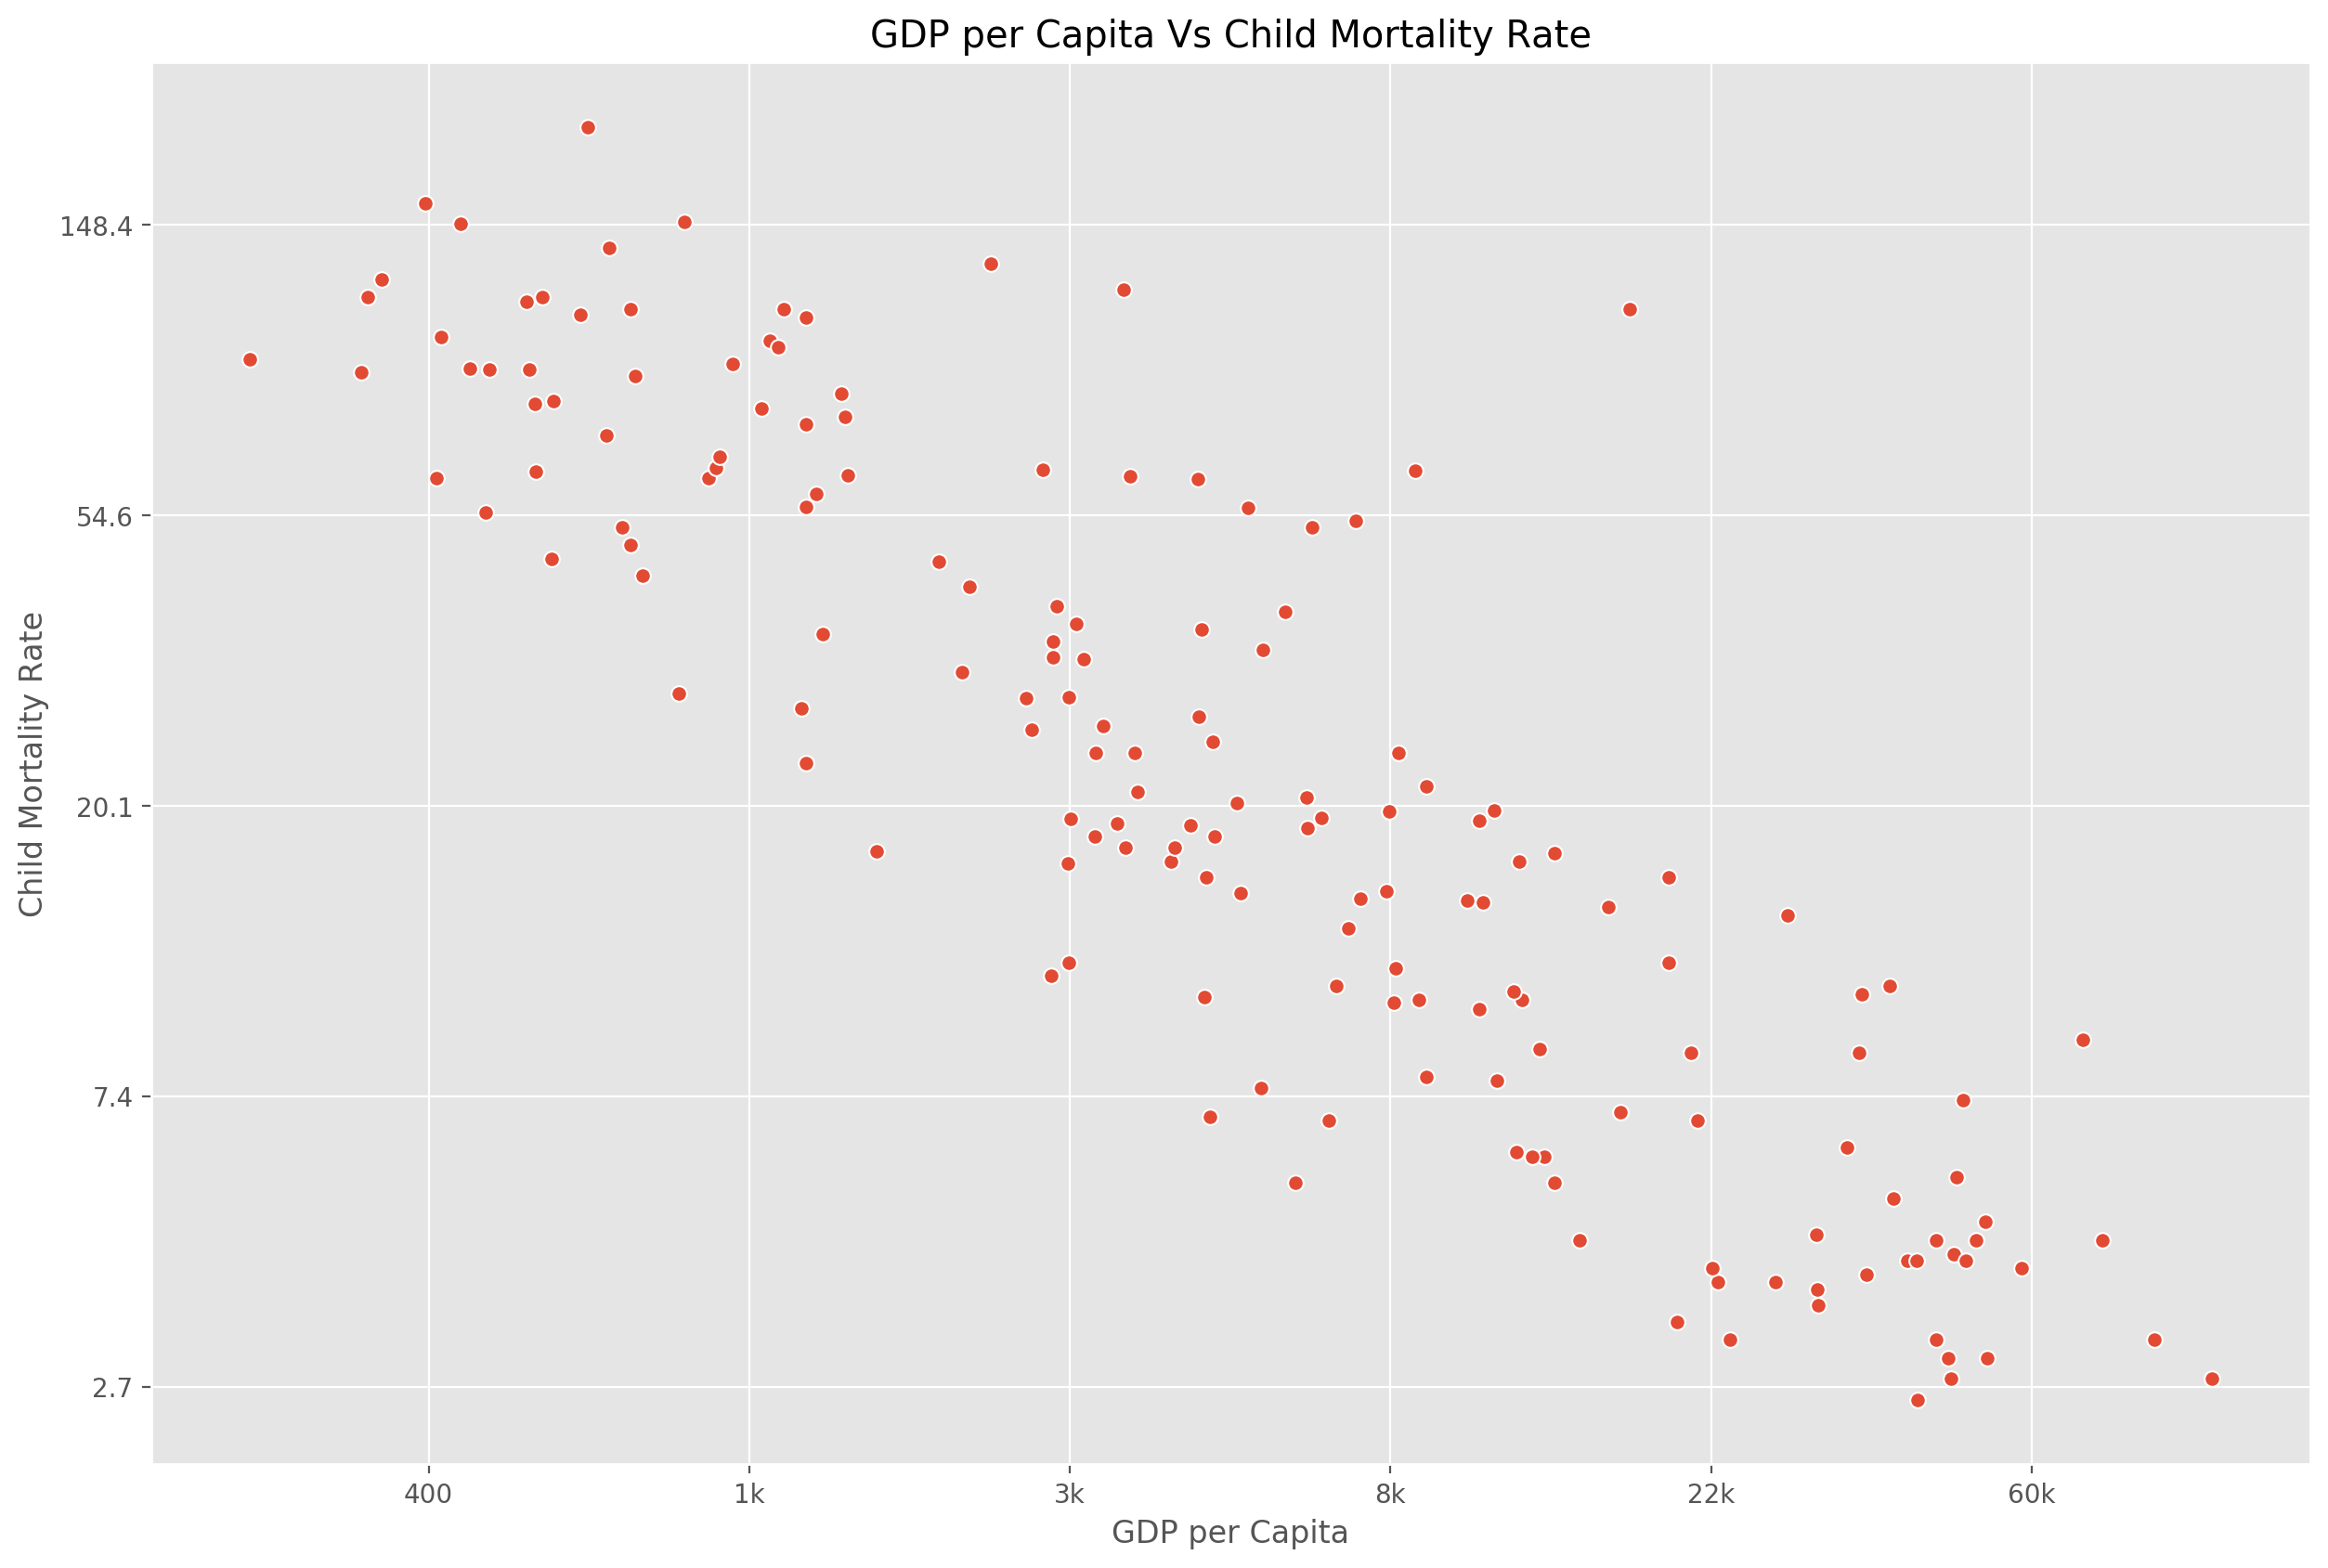

In [19]:
fig,ax = plt.subplots(figsize=(15,10),dpi=200)

gdpp = np.log(data["gdpp"].values)
mort = np.log(data["child_mort"].values)
sns.scatterplot(x=gdpp,y=mort)

ax.set_title("GDP per Capita Vs Child Mortality Rate")
ax.set_xlabel("GDP per Capita")
ax.set_ylabel("Child Mortality Rate")

ax.set_xticklabels(["150","400","1k","3k","8k","22k","60k","163k"])
ax.set_yticklabels(["1","2.7","7.4","20.1","54.6","148.4","403.4"])

fig.show()

**Note that the scatterplot has been created on a logarithmic scale due to huge spread between the values.**

**<span style = "color:green">We can infer from the above scatterplot that GDP Per Capita and Child Mortality Rate have very high magnitude of negative correlation.</span>**

**3. `Net Income Vs Child Mortality Rate`**

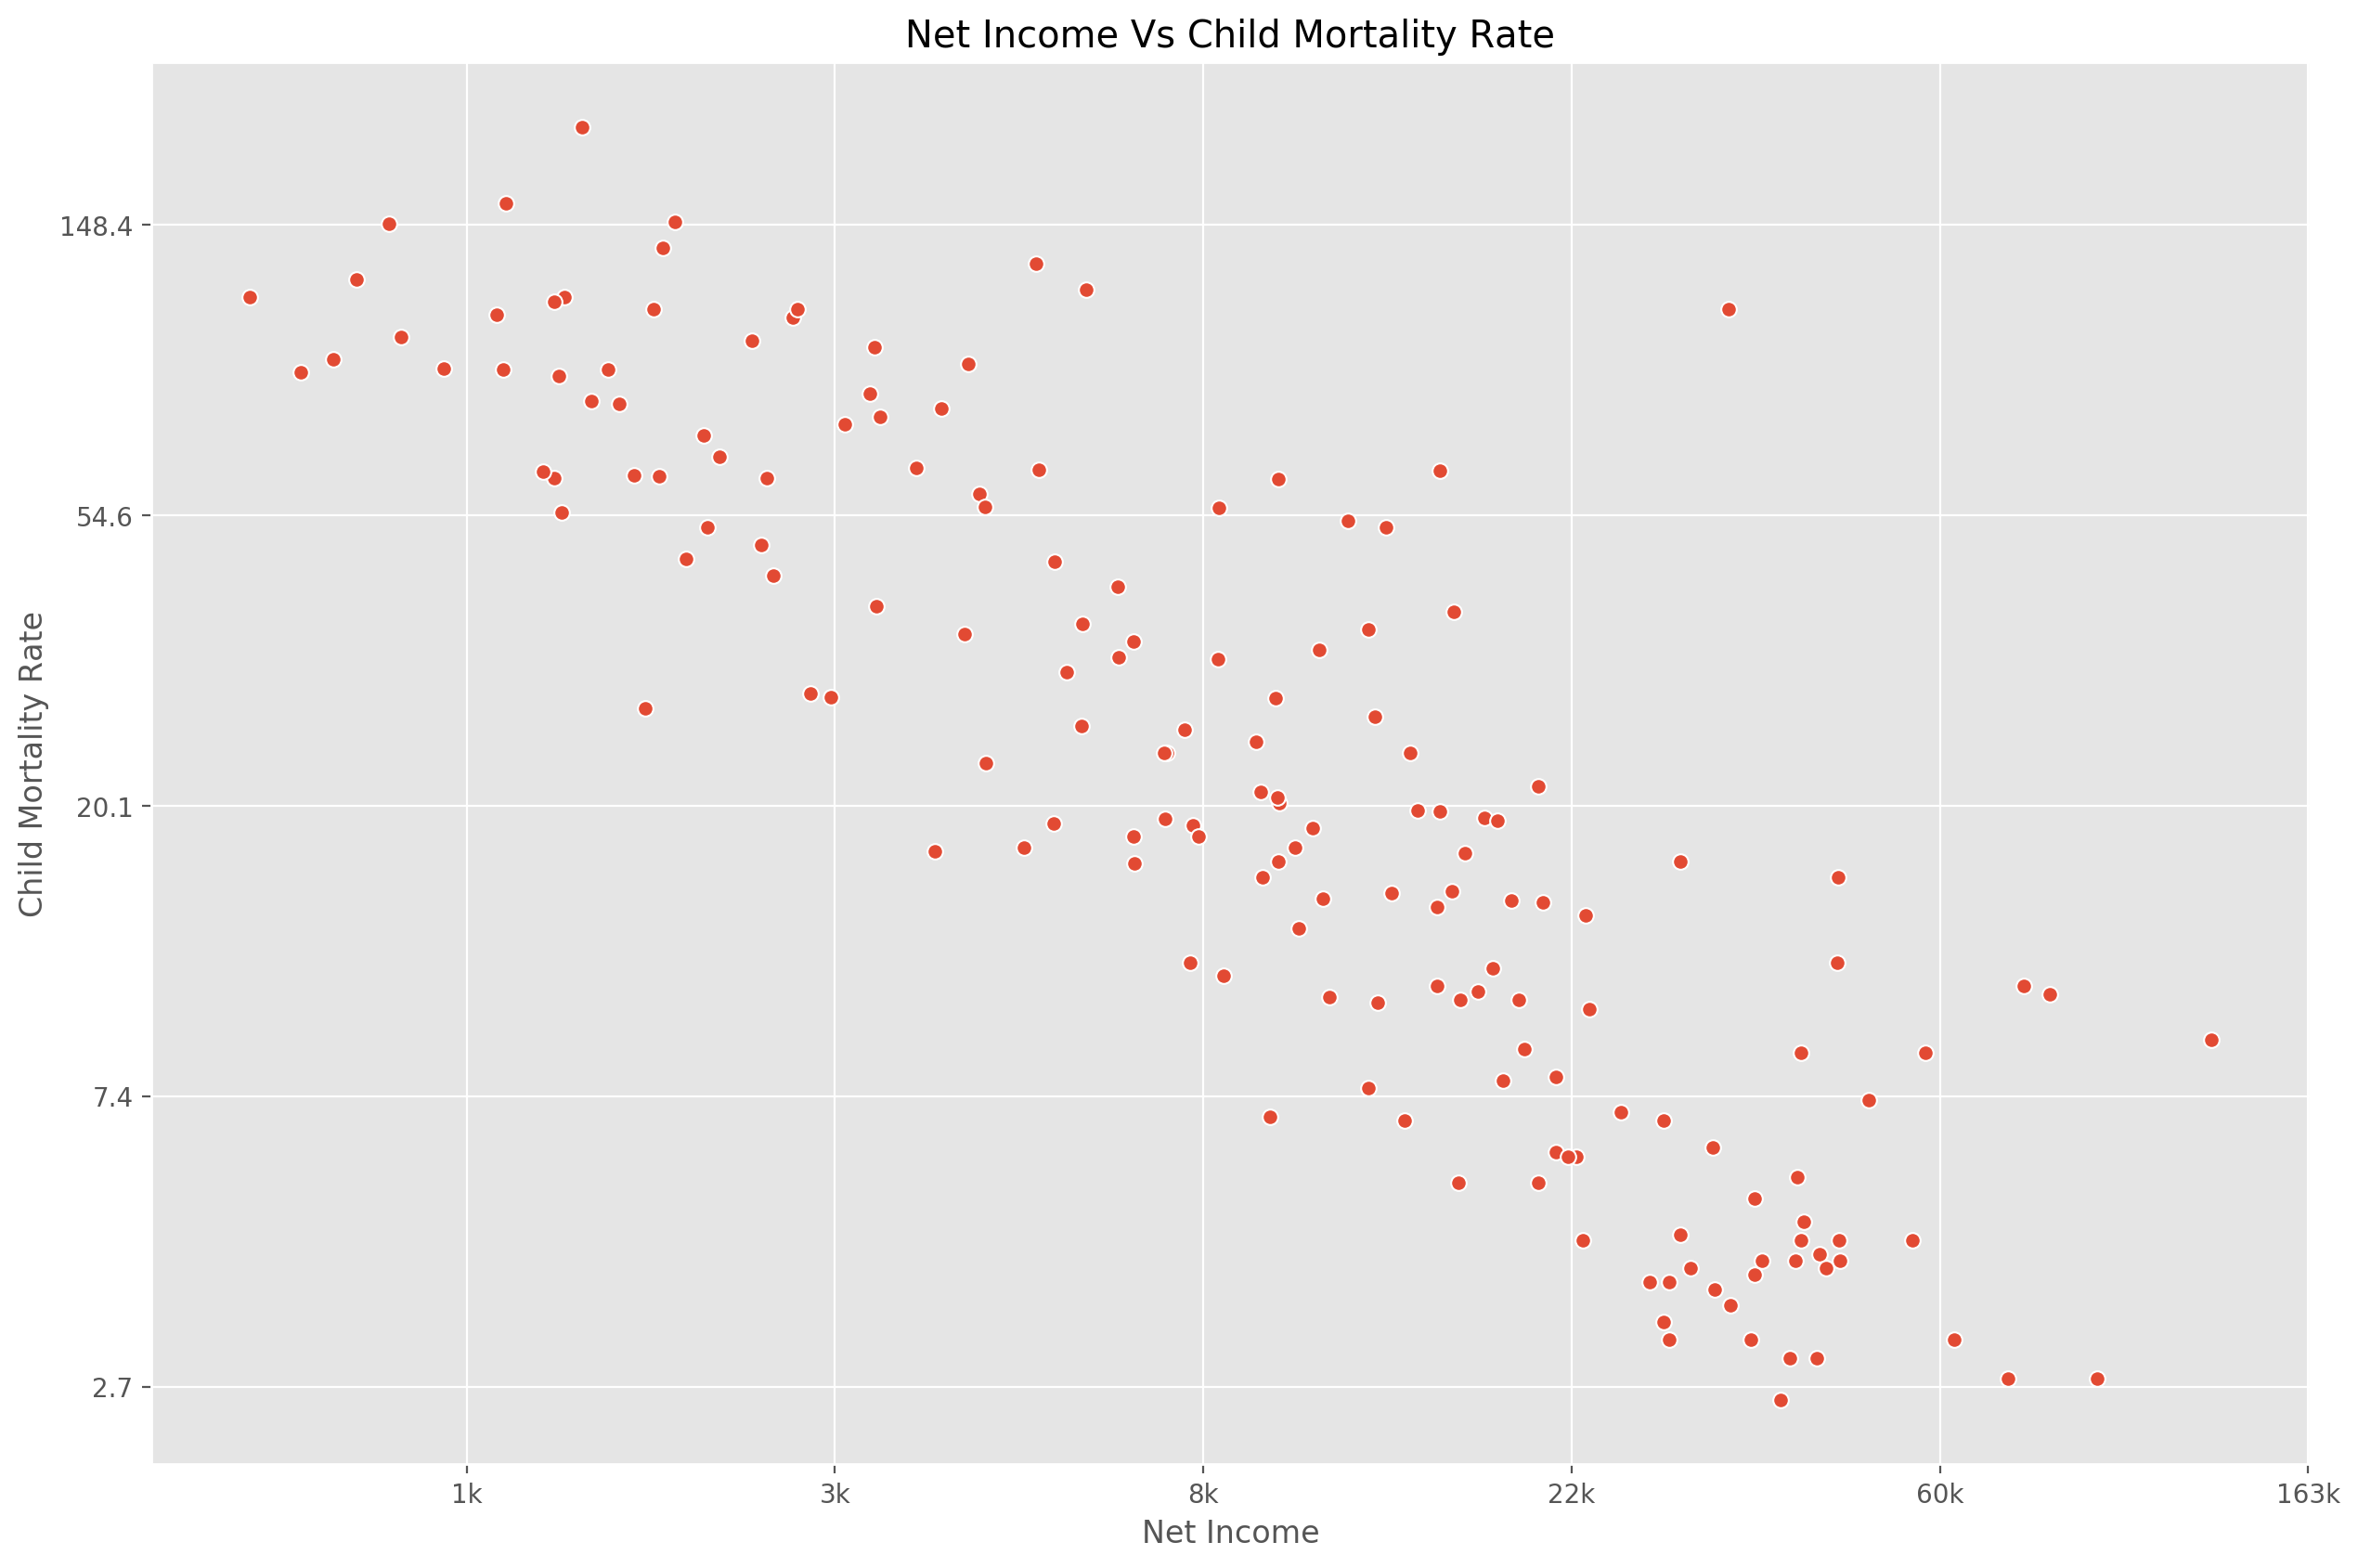

In [20]:
fig,ax = plt.subplots(figsize=(15,10),dpi=200)

inc = np.log(data["income"].values)
mort = np.log(data["child_mort"].values)
sns.scatterplot(x=inc,y=mort)

ax.set_title("Net Income Vs Child Mortality Rate")
ax.set_xlabel("Net Income")
ax.set_ylabel("Child Mortality Rate")

ax.set_xticklabels(["400","1k","3k","8k","22k","60k","163k","442k"])
ax.set_yticklabels(["1","2.7","7.4","20.1","54.6","148.4","403.4"])

fig.show()

**Note that the scatterplot has been created on a logarithmic scale due to huge spread between the values.**

**<span style = "color:green">We can infer from the above scatterplot that Net Income and Child Mortality Rate have very high magnitude of negative correlation, quite similar to GDP per Capita and Child Mortality Rate as we have seen above.</span>**

**4. `Total Fertility Rate Vs Child Mortality Rate`**

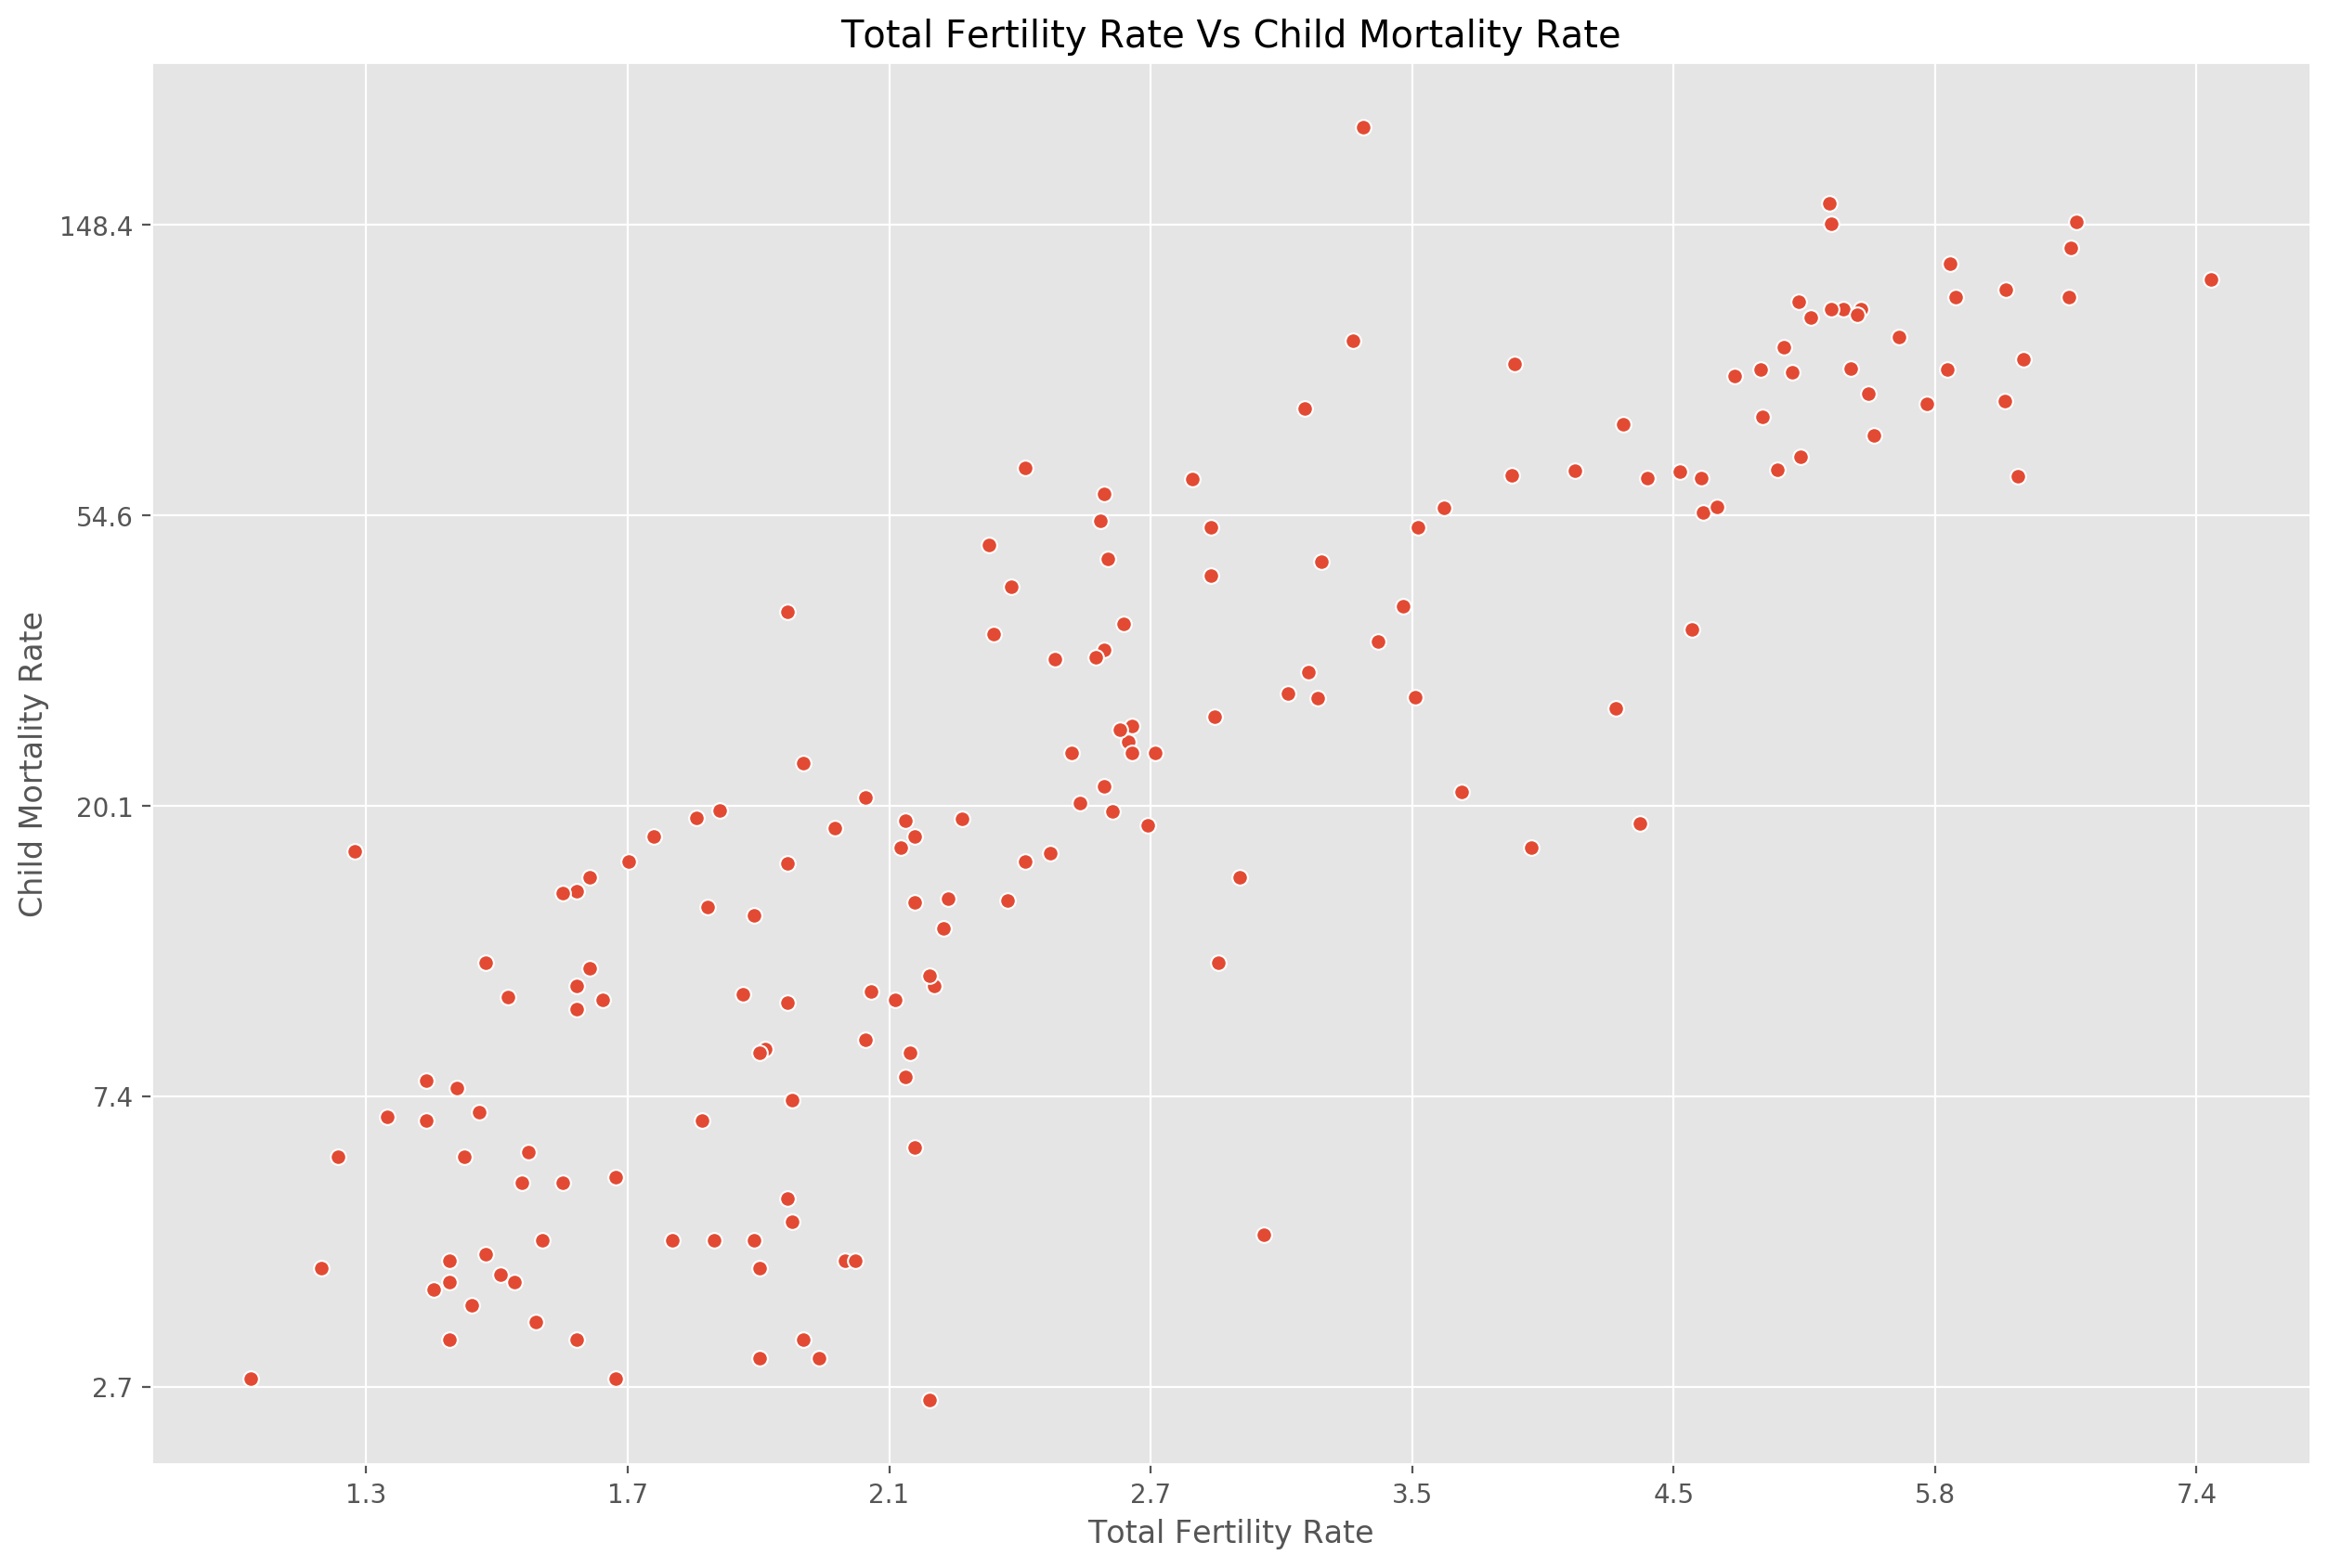

In [21]:
fig,ax = plt.subplots(figsize=(15,10),dpi=200)

fert = np.log(data["total_fer"].values)
mort = np.log(data["child_mort"].values)
sns.scatterplot(x=fert,y=mort)

ax.set_title("Total Fertility Rate Vs Child Mortality Rate")
ax.set_xlabel("Total Fertility Rate")
ax.set_ylabel("Child Mortality Rate")

ax.set_xticklabels(["1.0","1.3","1.7","2.1","2.7","3.5","4.5","5.8","7.4","9.5"])
ax.set_yticklabels(["1.0","2.7","7.4","20.1","54.6","148.4","403.4"])

fig.show()

**Note that the scatterplot has been created on a logarithmic scale due to huge spread between the values.**

**<span style = "color:green">We can infer from the above scatterplot that Total Fertility Rate and Child Mortality Rate have considerable positive correlation.</span>**

## Feature Engineering

**Creating a copy of the DataFrame to apply the new features**

In [22]:
data_new_features = data.copy()
data_new_features.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### 1. Computing real GDP per Capita and Net Income by adjusting the inflation factor

**<span style = "color:green">The GDP per Capita and the Net Income in the data are expressed in nominal figures, which doesn't exclude inflation, resulting the growth figure to be  inflated. Hence, it would be appropriate to adjust the respective variables with inflation so as to bring all the countries on an equal scale. This is done by using the following formula:</span>**

<span style = "color:green">$$GDP \space per \space Capita \space / \space Net \space Income \space (Deflated) = \frac {GDP \space per \space Capita \space / \space Net \space Income}{1 + Inflation}$$</span>

**Creating variables `gdpp_deflated` and `income_deflated`**

In [23]:
data_new_features["gdpp_deflated"] = data_new_features["gdpp"]/(1+data_new_features["inflation"]/100)

data_new_features["income_deflated"] = data_new_features["income"]/(1+data_new_features["inflation"]/100)

### 2. Computing absolute amounts of Exports, Imports and Health Spending

**<span style = "color:green">The variables Exports, Imports and Health Spending are given in percentages relative to the respective country's GDP per Capita. Hence, it would be appropiate to compute the absolute amounts and which portray a better visualisation of a country's economic situation.</span>**

**Creating variables `exports_total`, `imports_total` and `health_exp`**

In [24]:
data_new_features["exports_total"] = data_new_features["gdpp_deflated"]*(data_new_features["exports"]/100)

data_new_features["imports_total"] = data_new_features["gdpp_deflated"]*(data_new_features["imports"]/100)

data_new_features["health_exp"] = data_new_features["gdpp_deflated"]*(data_new_features["health"]/100)

### 3. Spitting Exports, Imports and Health Spending from GDP per Capita

**<span style = "color:green">GDP is the monetary value of all final economic goods and services produced in a country during a specific period of time. It is generally calculated using the following formula:</span>**

<span style = "color:green">$$GDP = Public \space Consumption + Government \space Expenditure + Investment + Net \space Exports $$</span>

**<span style = "color:green">Since Health Spending forms part of the Government Expenditure and Net Exports is Exports less Imports, we can split the GDP per Capita so as to have variables with no additional implicit correlation.</span>**

**<span style = "color:green">Also, instead of having 2 seperate variables Imports and Exports, we can have only a single variable Net Exports which explains the Trade Surplus or Deficit.</span>**

**Creating variables `net_exports` and `total_consumption`**

In [25]:
data_new_features["net_exports"] = data_new_features["exports_total"] - data_new_features["imports_total"]

data_new_features["total_consumption"] = data_new_features["gdpp_deflated"] - data_new_features["health_exp"] - \
                                         data_new_features["net_exports"]

### 4. Computing a new feature `Mortality Risk`

**<span style = "color:green">The variable Child Mortality Rate means the death of children under 5 years of age per 1000 live births, and the variable Total Fertility Rate means the number of children that would be born to each woman.</span>**

**<span style = "color:green">A new feature, namely, Mortality Risk can be created from the above 2 variables which means the number of children having the risk of mortality under 5 years of age for each woman. This is given by:</span>**

<span style = "color:green">$$Mortality \space Risk = Total \space Fertility \space Rate  \times \frac {Child \space Mortality \space Rate} {1000} $$</span>

**Creating variable `mort_risk`**

In [26]:
data_new_features["mort_risk"] = data_new_features["total_fer"]*(data_new_features["child_mort"]/1000)

##  Preprocessing the Data for Clustering

### 1. Removing unnecessary variables

<span style = "color:green">**Retaining only the following essential variables in the DataFrame:**
</span>
- **`country`**
- **`income_deflated`**
- **`total_consumption`**
- **`net_exports`**
- **`health_exp`**
- **`mort_risk`**
- **`life_expec`**

In [27]:
data_new_features = data_new_features[["country", "income_deflated", "total_consumption", 
                                       "net_exports", "health_exp", "mort_risk", "life_expec"]]

data_new_features.head()

,country,income_deflated,total_consumption,net_exports,health_exp,mort_risk,life_expec
0,Afghanistan,1471.125731,643.347588,-176.349598,38.301718,0.524964,56.2
1,Albania,9503.301751,4464.202316,-806.335535,256.383386,0.027390,76.3
2,Algeria,11111.111111,3412.418605,268.906115,160.191214,0.078897,76.5
3,Angola,4820.261438,2242.299837,559.493464,82.193627,0.733040,60.1
4,Antigua and Barbuda,18828.864353,12913.190063,-1611.593060,725.216877,0.021939,76.8


### 2. Scaling the data

In [28]:
data_scaled = data_new_features.drop("country",axis=1)
cols = data_scaled.columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_scaled)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = cols
data_scaled.head()

,income_deflated,total_consumption,net_exports,health_exp,mort_risk,life_expec
0,-0.808194,-0.719893,-0.241140,-0.559015,1.573693,-1.619092
1,-0.368886,-0.445318,-0.402127,-0.435617,-0.597441,0.647866
2,-0.280949,-0.520902,-0.127360,-0.490046,-0.372693,0.670423
3,-0.625018,-0.604989,-0.053103,-0.534180,2.481620,-1.179234
4,0.141162,0.161842,-0.607903,-0.170333,-0.621226,0.704258


### 3. Computing the Hopkins Statistic

**Defining the function**

In [29]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2,
                                    return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

**Running for 5 iterations**

In [30]:
for i in range(1,6):
    h = hopkins(data_scaled)
    print(f"Iteration {i}: {round(h,4)}")

Iteration 1: 0.9354
Iteration 2: 0.8884
Iteration 3: 0.9344
Iteration 4: 0.9359
Iteration 5: 0.9208


<span style = "color:green">**From the above results, we can conclude that the data has a very high tendency to be clustered and hence we can proceed further.**</span>

## Clustering using the K-means algorithm

<span style = "color:green">**Finding the optimal number of clusters by computing the Sum of Squared Distances (SSD) and Silhouette Scores and analysing how many countries are falling under each cluster.**</span>

**Computing SSD's for a range of possible clusters**

In [31]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50,random_state=100)
    kmeans.fit(data_scaled)
    ssd.append(kmeans.inertia_)

**Plotting the Elbow Curve**

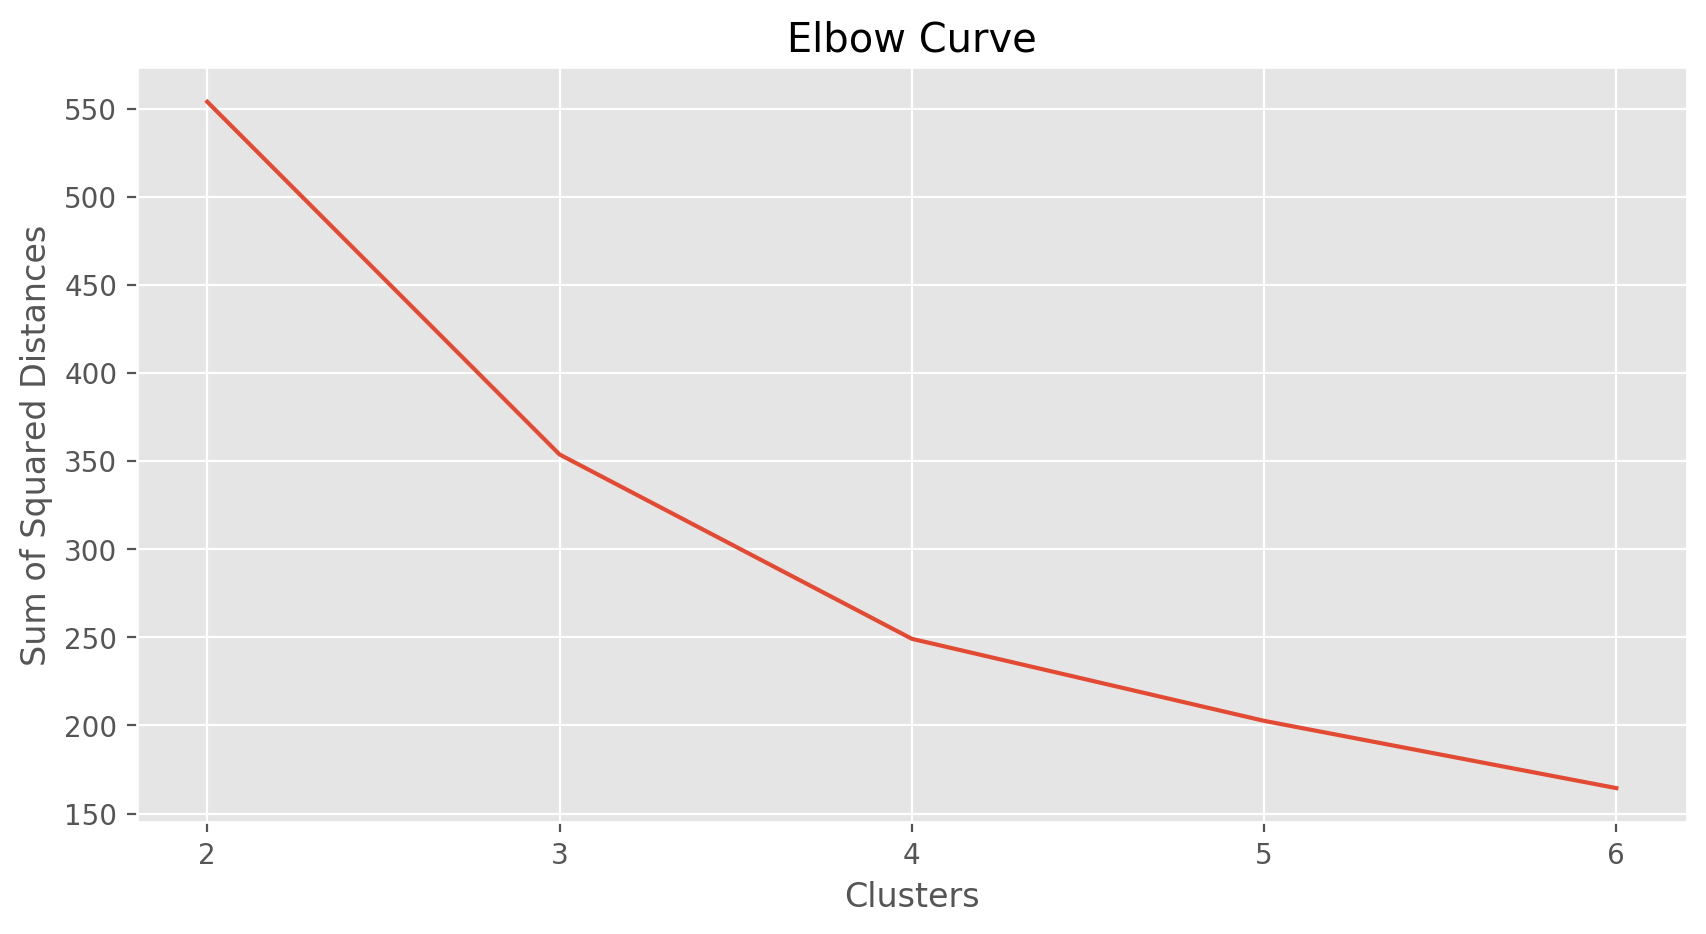

In [32]:
fig,ax = plt.subplots(figsize=(10,5),dpi=200)

ax.plot(range_n_clusters,ssd)

ax.set_title("Elbow Curve")
ax.set_xlabel("Clusters")
ax.set_ylabel("Sum of Squared Distances")

plt.xticks(range_n_clusters)

fig.show()

**Computing the Silhouette Scores**

In [33]:
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50,random_state=100)
    kmeans.fit(data_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print(f"Clusters = {num_clusters}: {round(silhouette_avg,4)}")

Clusters = 2: 0.5339
Clusters = 3: 0.4803
Clusters = 4: 0.4949
Clusters = 5: 0.4647
Clusters = 6: 0.3999


**Computing the number of countries falling under each cluster**

In [34]:
for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50,random_state=100)
    kmeans.fit(data_scaled)
    cluster_labels = pd.Series(kmeans.labels_)
    
    print(f"Clusters = {num_clusters}:")
    
    for cluster in range(num_clusters):
        count = (cluster_labels == cluster).sum()
        print(f"{cluster}: {count} countries")
    
    print("")

Clusters = 2:
0: 36 countries
1: 131 countries

Clusters = 3:
0: 96 countries
1: 26 countries
2: 45 countries

Clusters = 4:
0: 45 countries
1: 93 countries
2: 27 countries
3: 2 countries

Clusters = 5:
0: 45 countries
1: 22 countries
2: 83 countries
3: 2 countries
4: 15 countries

Clusters = 6:
0: 21 countries
1: 66 countries
2: 25 countries
3: 2 countries
4: 15 countries
5: 38 countries



<span style = "color:green">**Upon observing the above results, it would be appropriate to go with 3 clusters as the number of countries falling under the respective clusters seem to be balanced and the respective SSD's and Silhouette Scores also look good at that particular number of clusters.**</span>

**Fitting the model with k = 3**

In [35]:
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=100)
kmeans.fit(data_scaled)

kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2])

**Assigning the cluster ID's to the DataFrame**

In [36]:
data_new_features["km_cluster_id"] = kmeans.labels_

## Analysis of Clusters Formed under K-means Clustering

**List of counties falling under each Cluster**

In [37]:
for i in range(3):
    
    countries = data_new_features.loc[data_new_features["km_cluster_id"]==i,"country"].values
    
    print(f"Cluster {i}: {len(countries)} Countries")
    
    for country in countries:
        if country != countries[-1]:
            print(country,end=", ")
        else:
            print(country,end="\n\n")

Cluster 0: 96 Countries
Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Cyprus, Czech Republic, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Georgia, Greece, Grenada, Guatemala, Guyana, Hungary, India, Indonesia, Iran, Iraq, Israel, Jamaica, Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lebanon, Libya, Lithuania, Macedonia, FYR, Malaysia, Maldives, Malta, Mauritius, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro, Morocco, Myanmar, Nepal, Oman, Panama, Paraguay, Peru, Philippines, Poland, Portugal, Romania, Russia, Samoa, Saudi Arabia, Serbia, Seychelles, Slovak Republic, Slovenia, Solomon Islands, South Korea, Sri Lanka, St. Vincent and the Grenadines, Suriname, Tajikistan, Thailand, Tonga, Tunisia, Turkey, Turkmenistan, Ukraine, Uruguay, Uzbekistan, Vanuatu, 

**Creating Scatterplots for `Total Consumption`, `Net Income (Deflated)` and `Mortality Risk`**

**1. `Total Consumption` Vs `Net Income (Deflated)`**

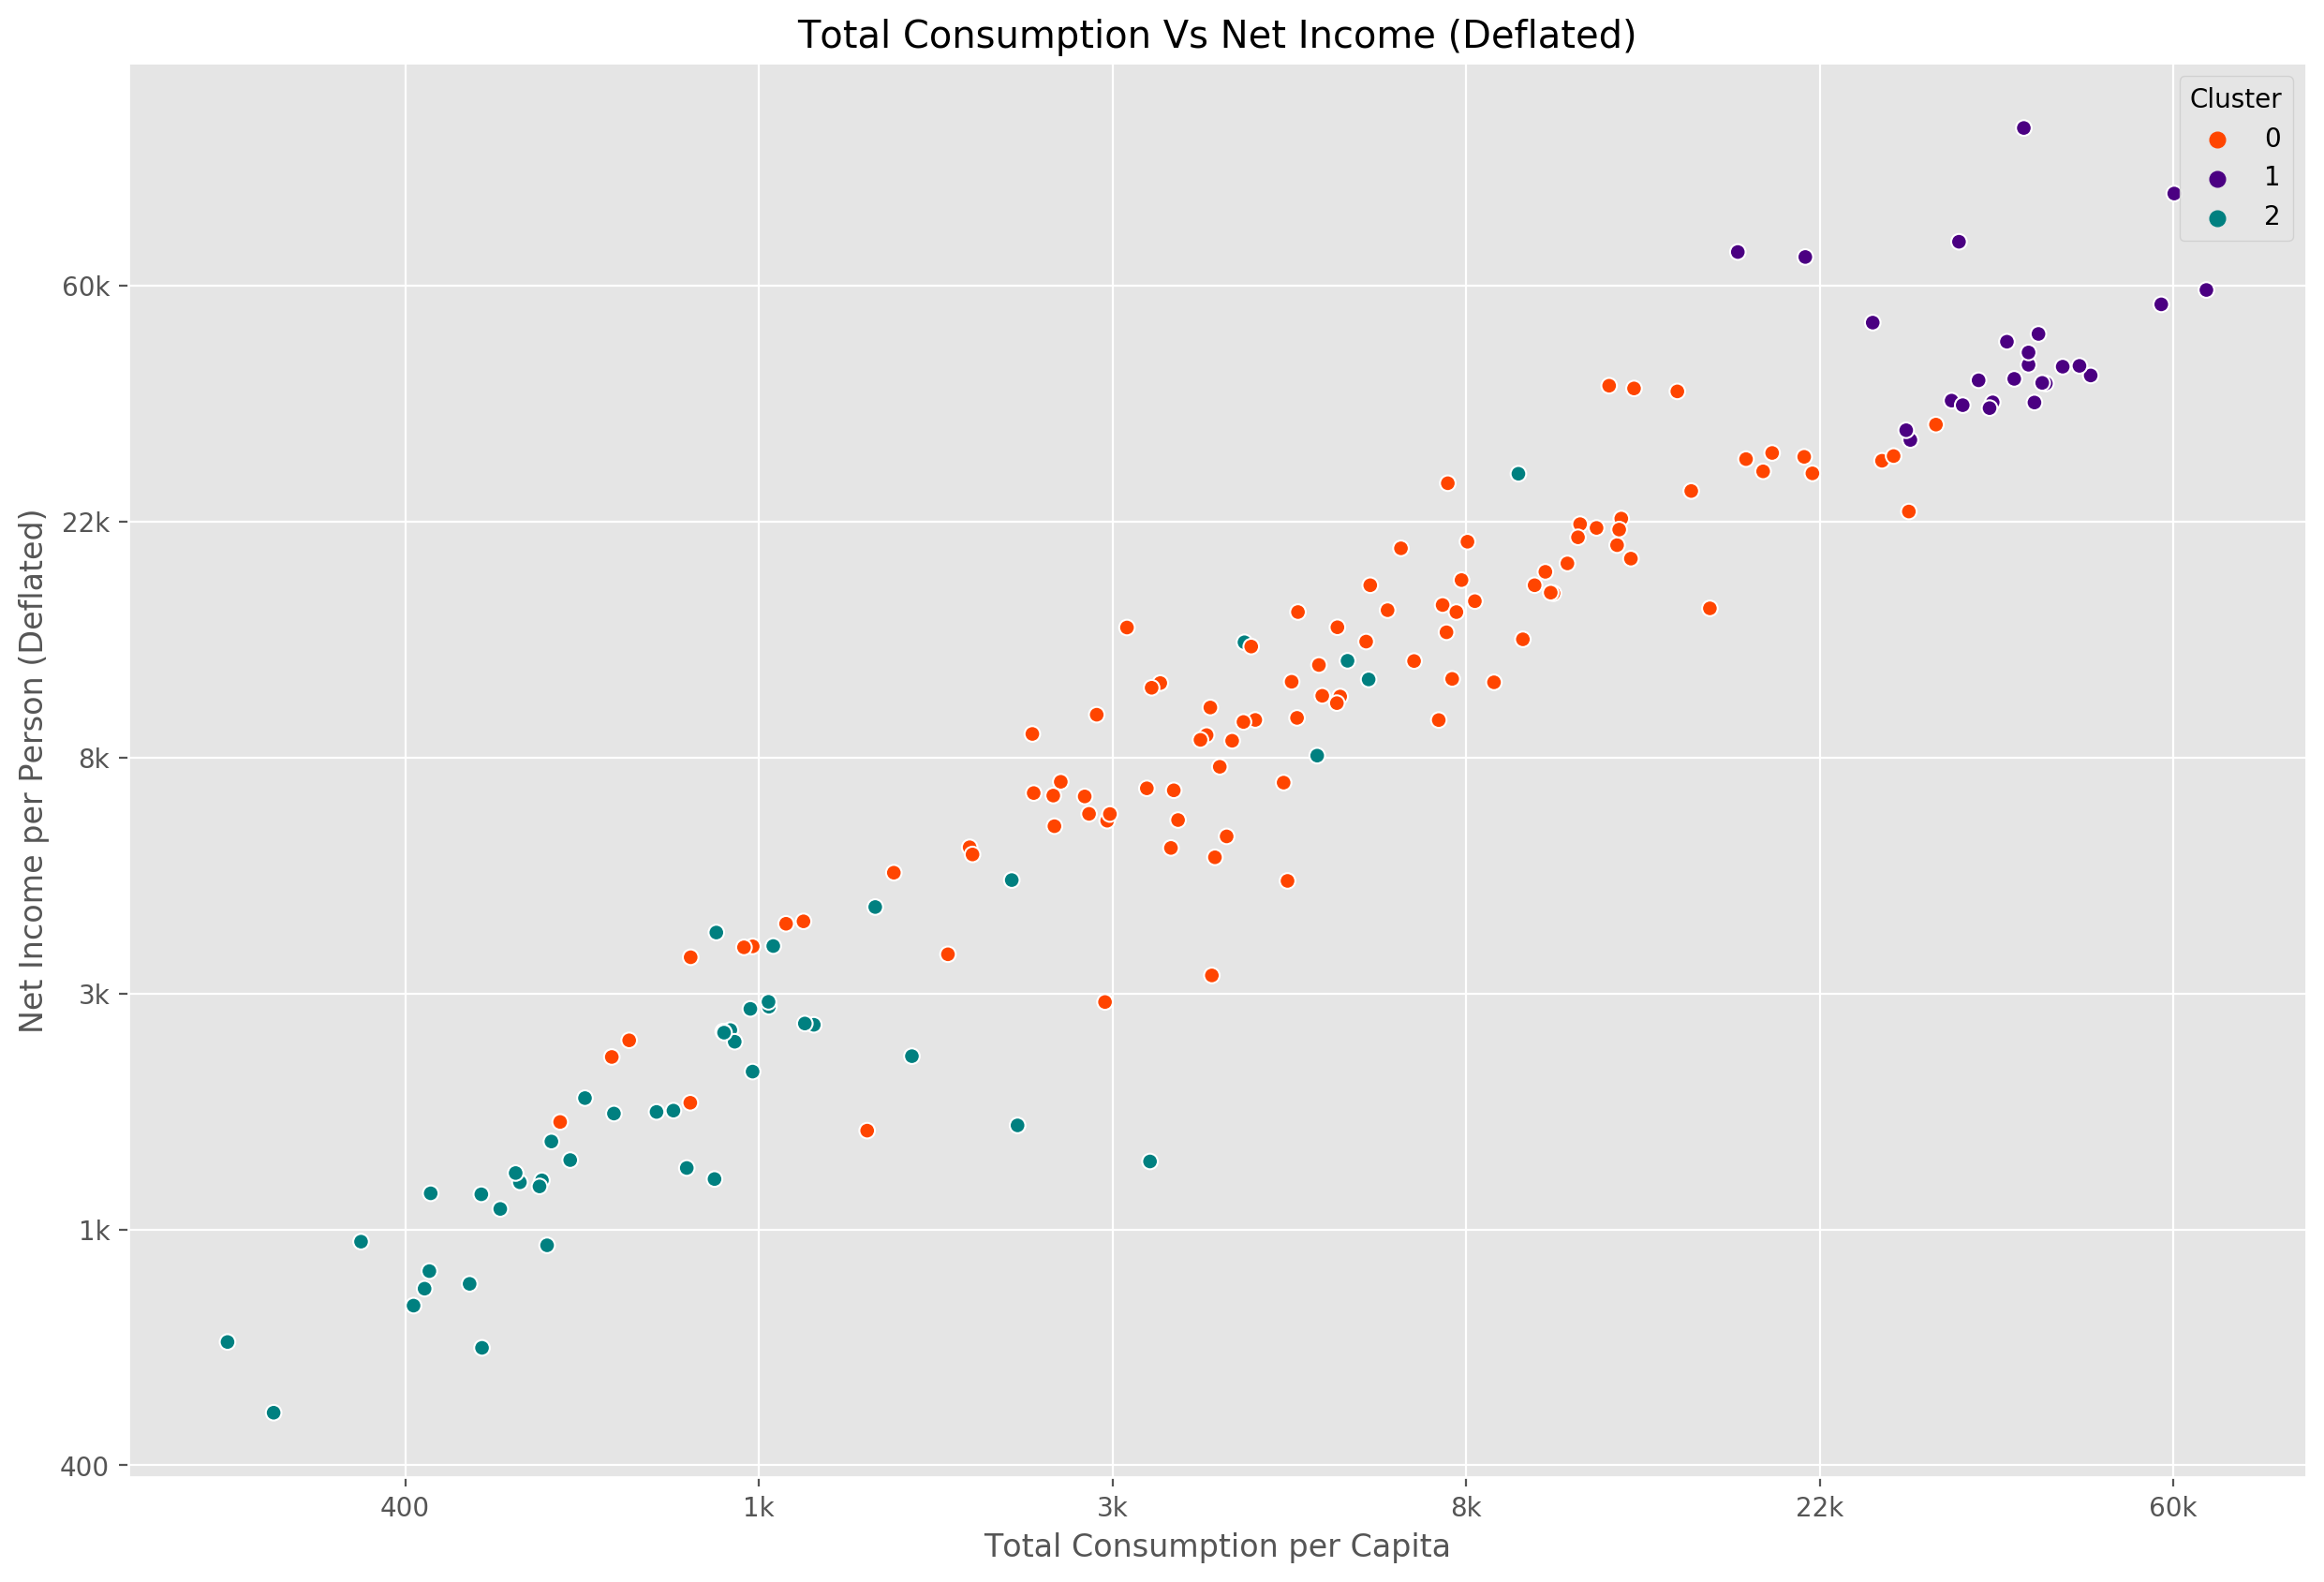

In [38]:
fig,ax = plt.subplots(figsize=(15,10),dpi=200)

cons = np.log(data_new_features["total_consumption"].values)
inc = np.log(data_new_features["income_deflated"].values)
sns.scatterplot(x=cons,y=inc,hue=data_new_features["km_cluster_id"].values,
                palette=["orangered","indigo","teal"])

ax.set_title("Total Consumption Vs Net Income (Deflated)")
ax.set_xlabel("Total Consumption per Capita")
ax.set_ylabel("Net Income per Person (Deflated)")
ax.legend(title="Cluster")

ax.set_xticklabels(["150","400","1k","3k","8k","22k","60k","163k"])
ax.set_yticklabels(["150","400","1k","3k","8k","22k","60k","163k"])

fig.show()

**Note that the scatterplot has been created on a logarithmic scale due to huge spread between the values.**

**2. `Total Consumption` Vs `Mortality Risk`**

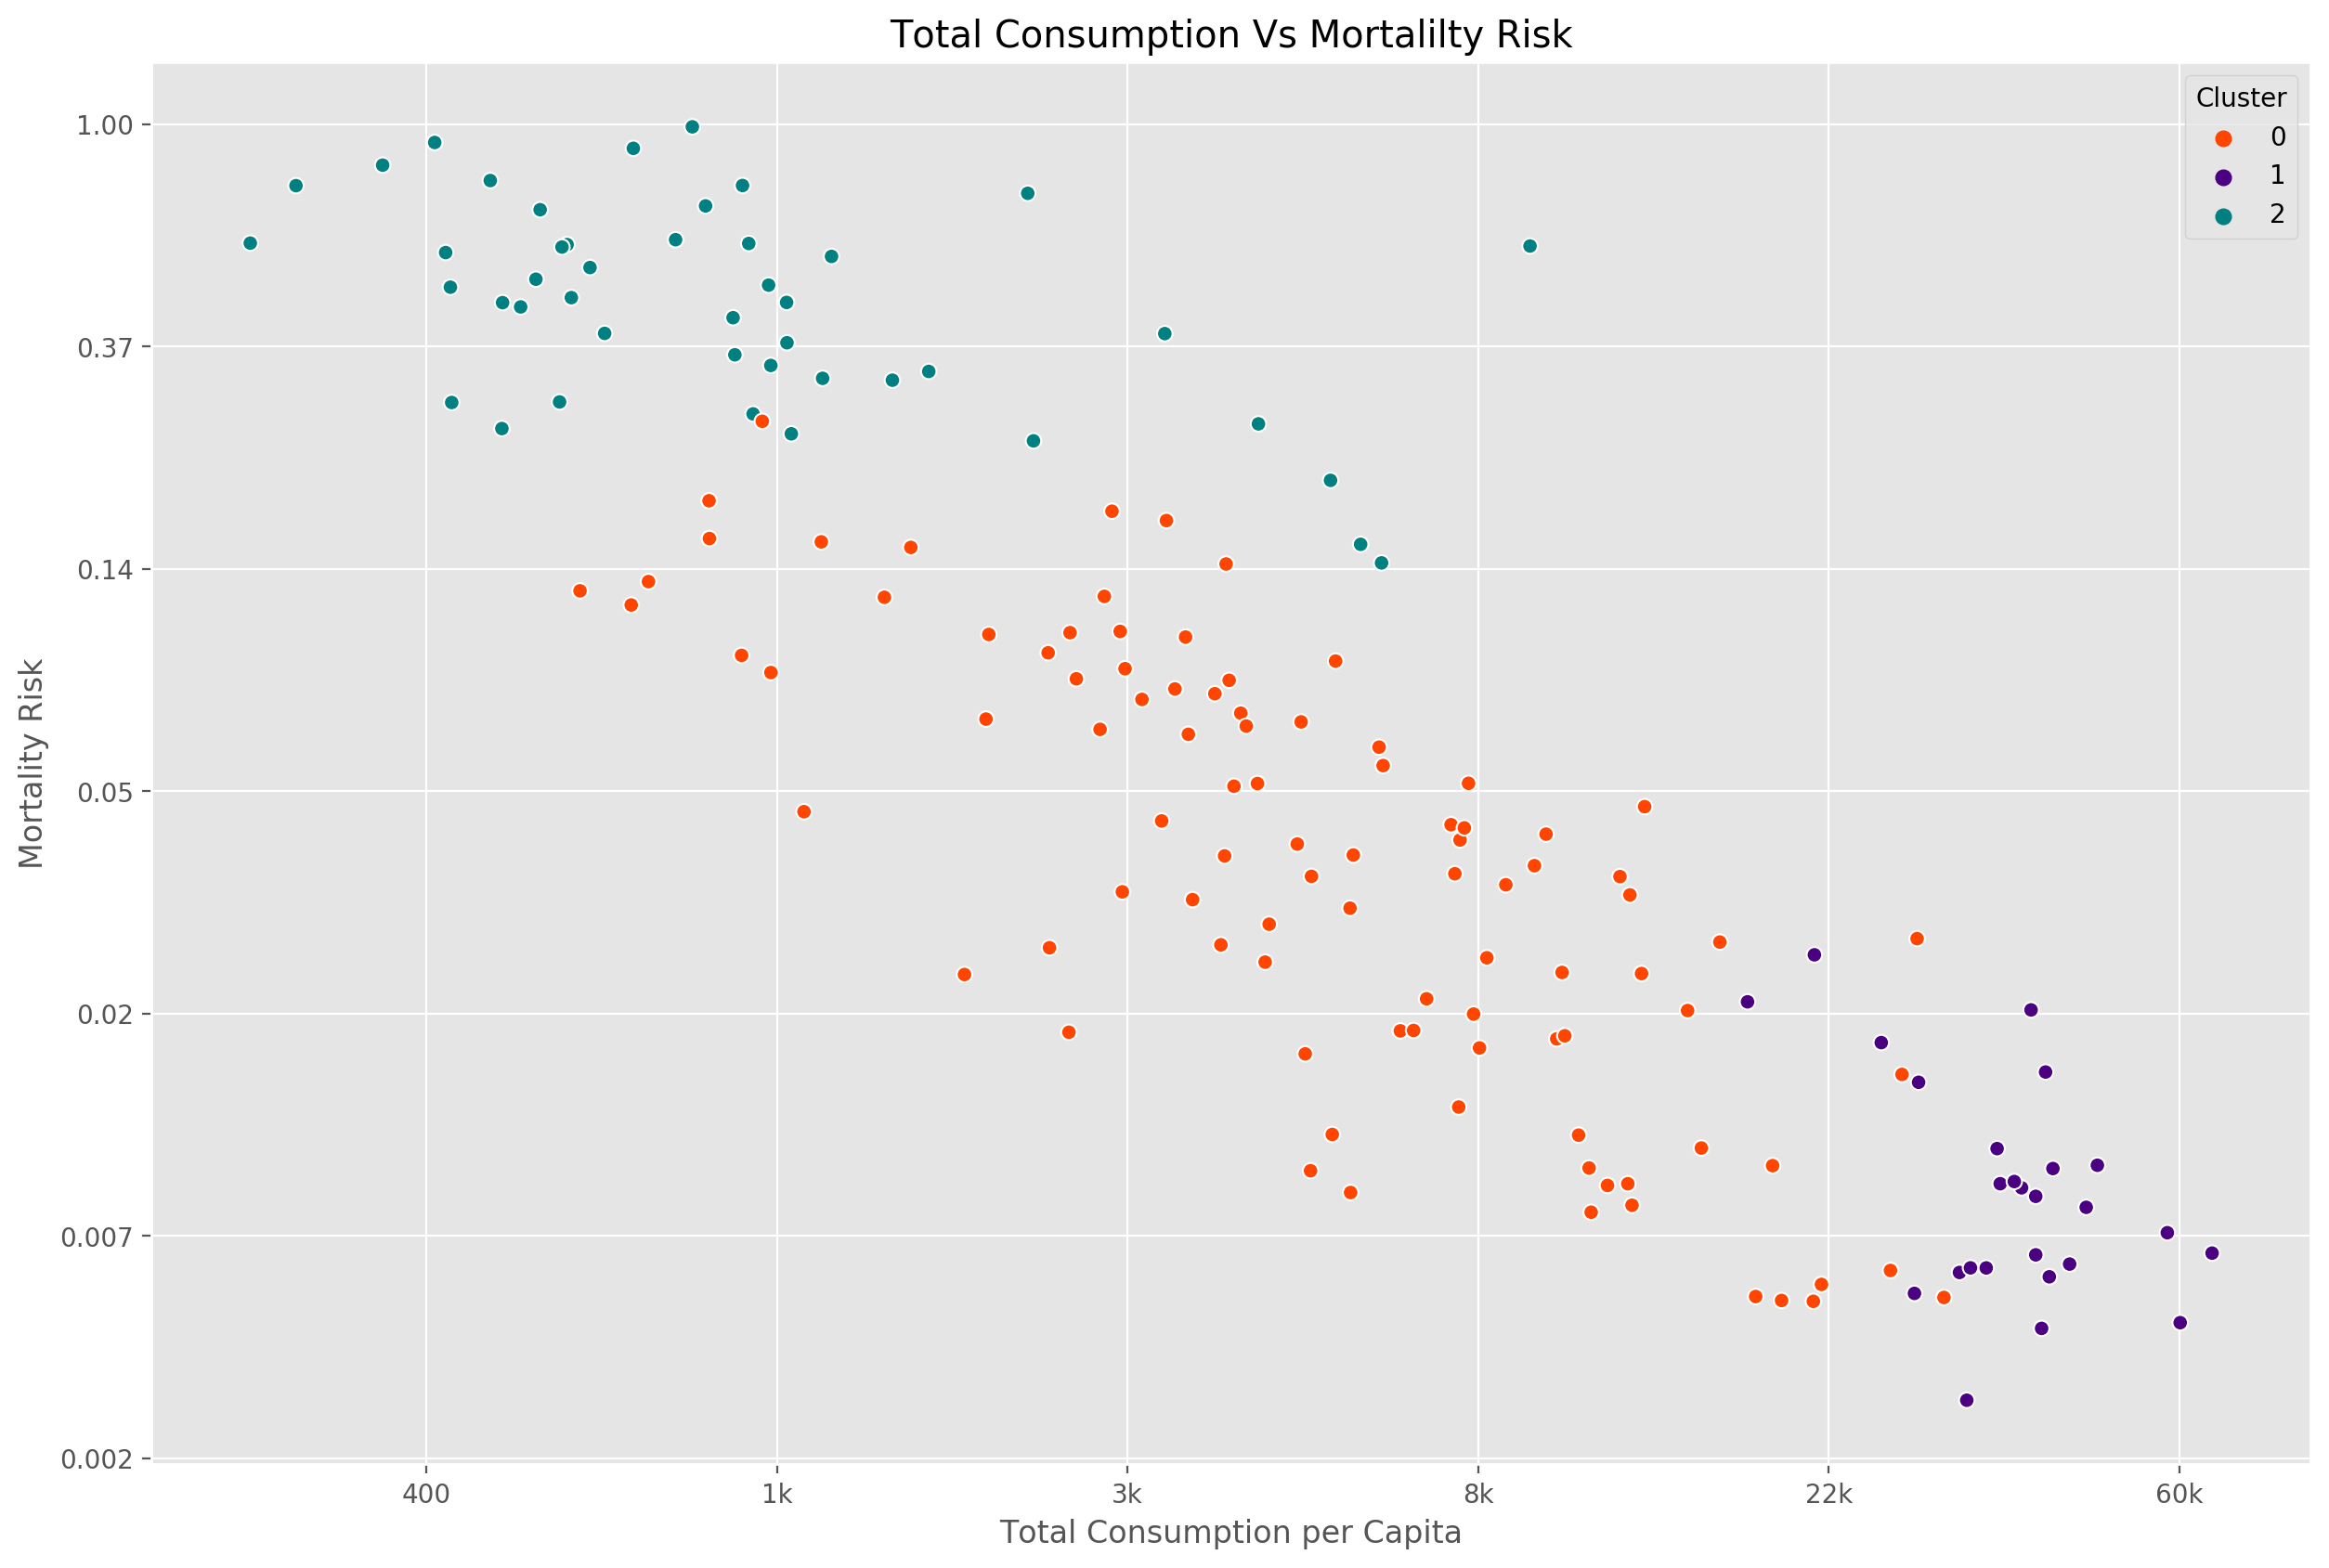

In [39]:
fig,ax = plt.subplots(figsize=(15,10),dpi=200)

cons = np.log(data_new_features["total_consumption"].values)
mort = np.log(data_new_features["mort_risk"].values)
sns.scatterplot(x=cons,y=mort,hue=data_new_features["km_cluster_id"].values,
                palette=["orangered","indigo","teal"])

ax.set_title("Total Consumption Vs Mortalilty Risk")
ax.set_xlabel("Total Consumption per Capita")
ax.set_ylabel("Mortality Risk")
ax.legend(title="Cluster")

ax.set_xticklabels(["150","400","1k","3k","8k","22k","60k","163k"])
ax.set_yticklabels(["0.001","0.002","0.007","0.02","0.05","0.14","0.37","1.00","2.71"])

fig.show()

**Note that the scatterplot has been created on a logarithmic scale due to huge spread between the values.**

**3. `Net Income (Deflated)` Vs `Mortality Risk`**

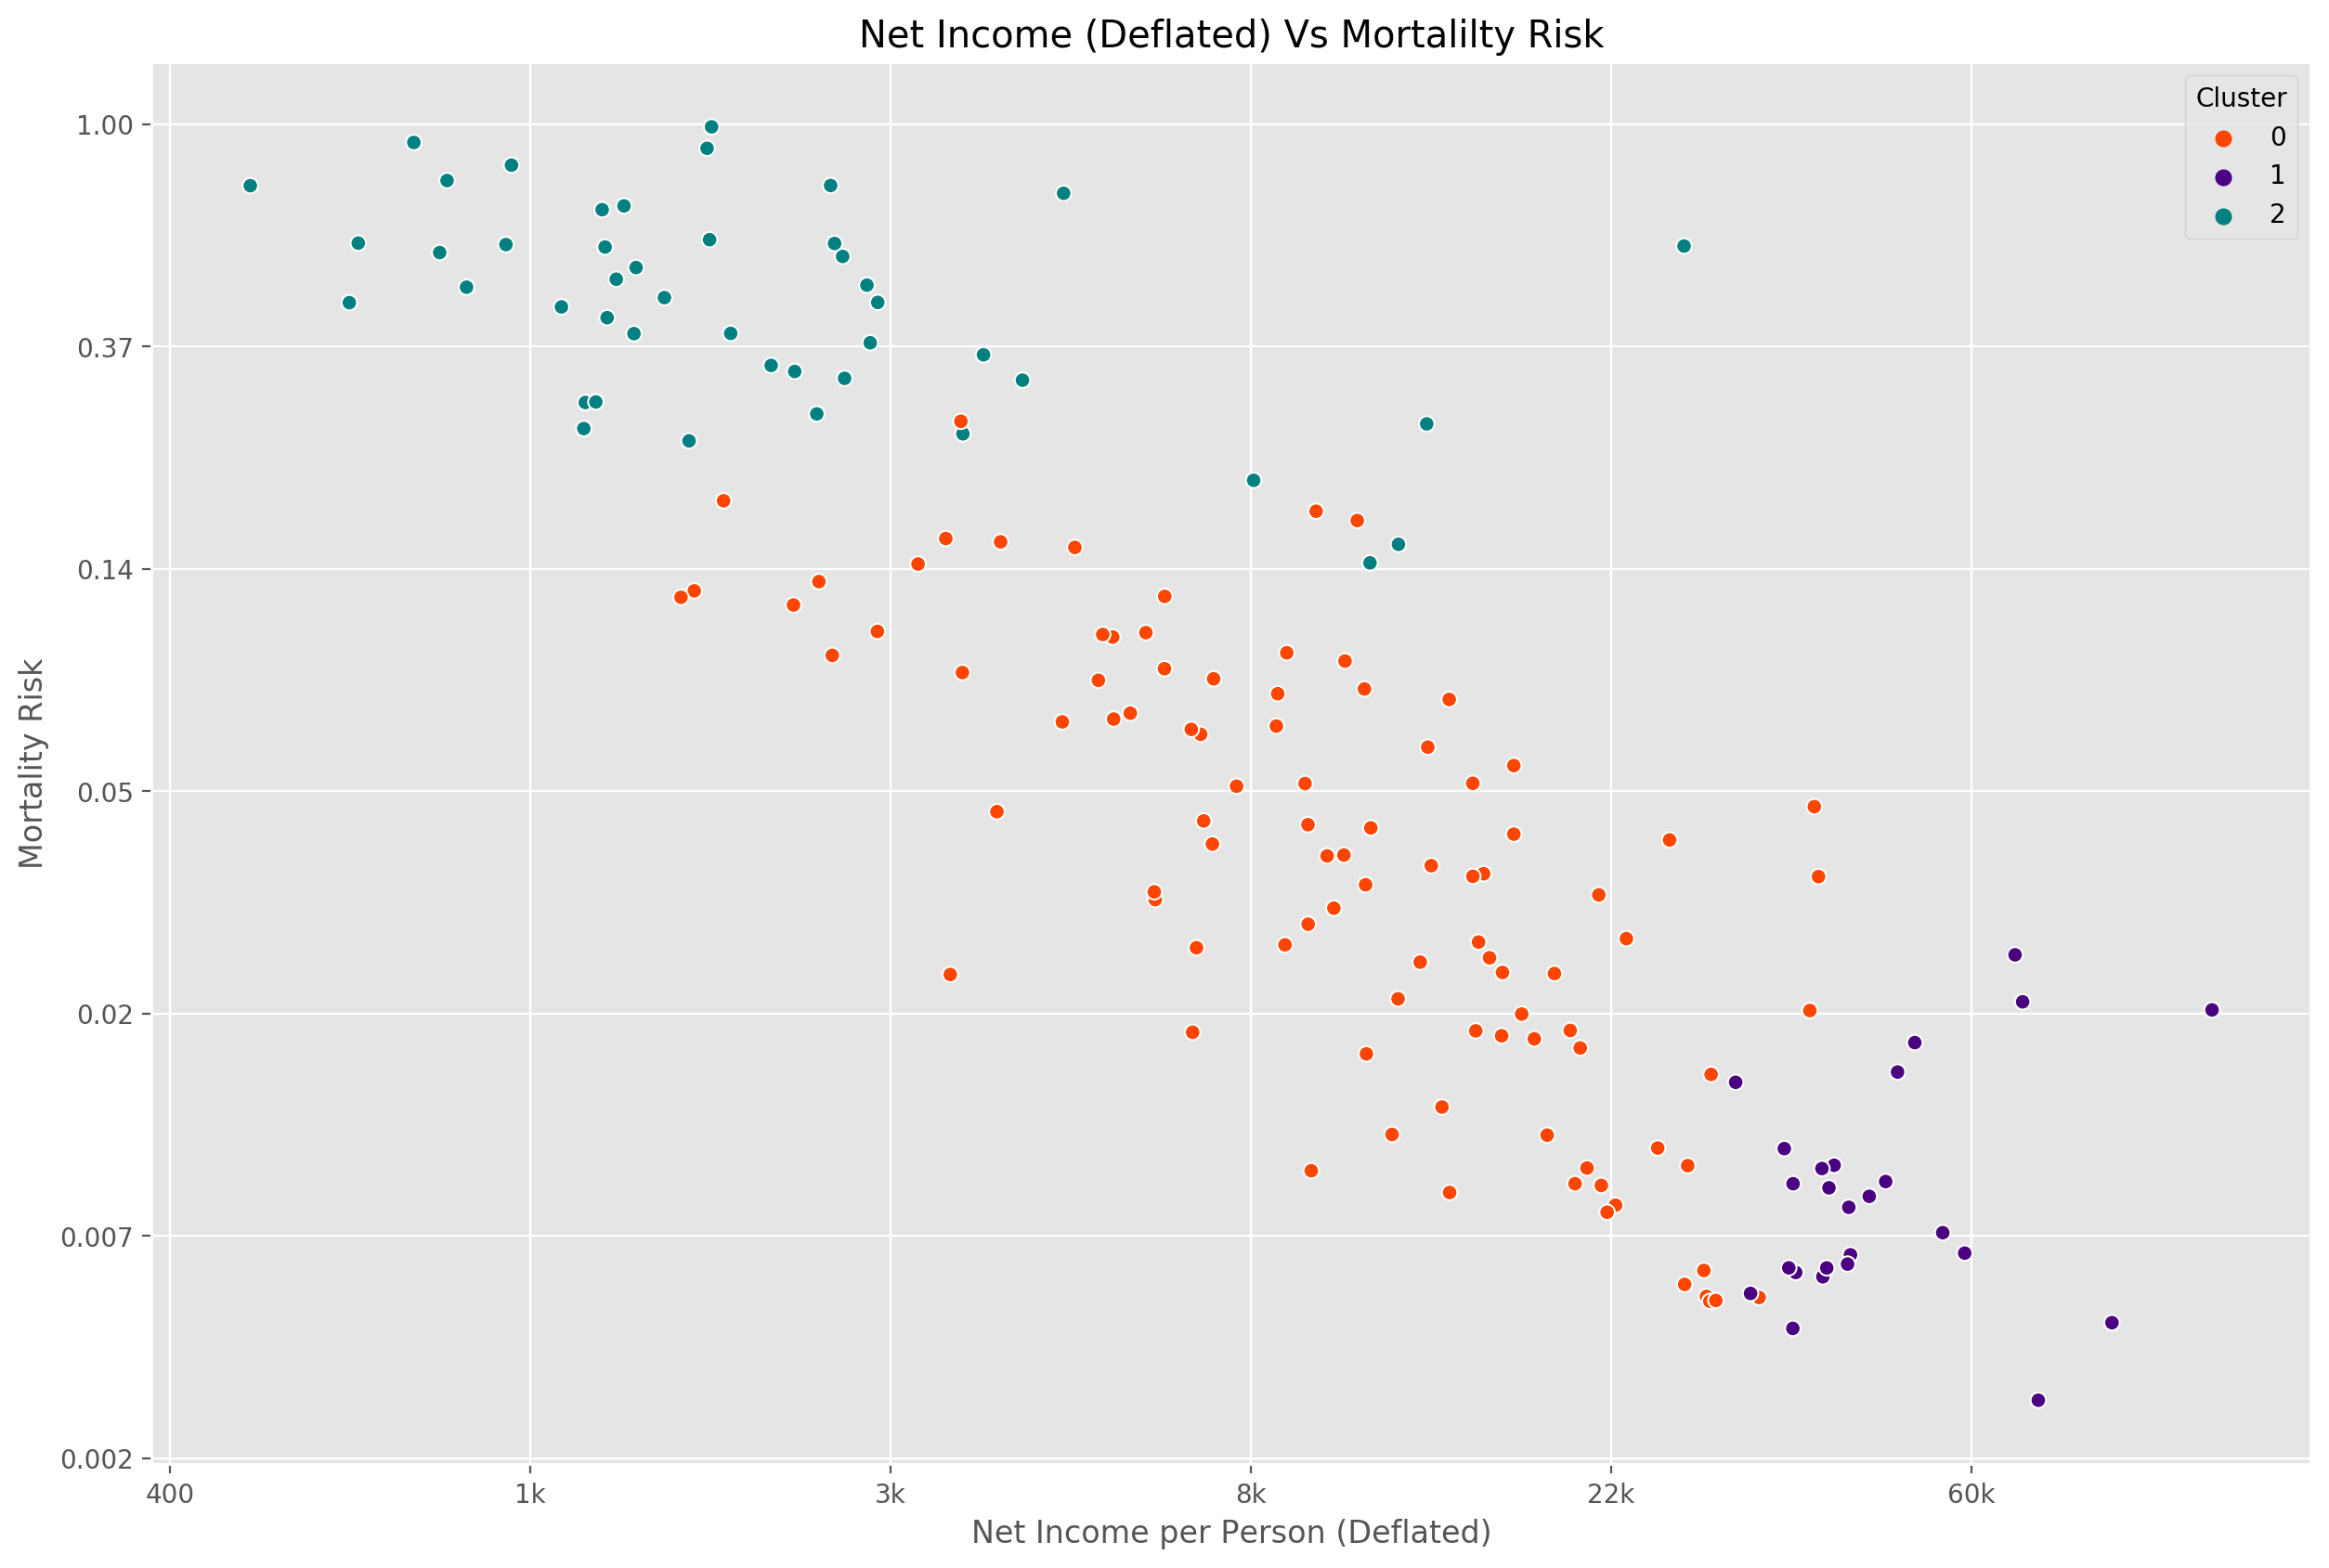

In [40]:
fig,ax = plt.subplots(figsize=(15,10),dpi=200)

inc = np.log(data_new_features["income_deflated"].values)
mort = np.log(data_new_features["mort_risk"].values)
sns.scatterplot(x=inc,y=mort,hue=data_new_features["km_cluster_id"].values,
                palette=["orangered","indigo","teal"])

ax.set_title("Net Income (Deflated) Vs Mortalilty Risk")
ax.set_xlabel("Net Income per Person (Deflated)")
ax.set_ylabel("Mortality Risk")
ax.legend(title="Cluster")

ax.set_xticklabels(["150","400","1k","3k","8k","22k","60k","163k"])
ax.set_yticklabels(["0.001","0.002","0.007","0.02","0.05","0.14","0.37","1.00","2.71"])

fig.show()

**Note that the scatterplot has been created on a logarithmic scale due to huge spread between the values.**

**Creating Boxplots for `Net Income (Deflated)`, `Mortality Risk`, `Health Expenditure` and `Life Expectancy`**

**1. `Net Income (Deflated)`**

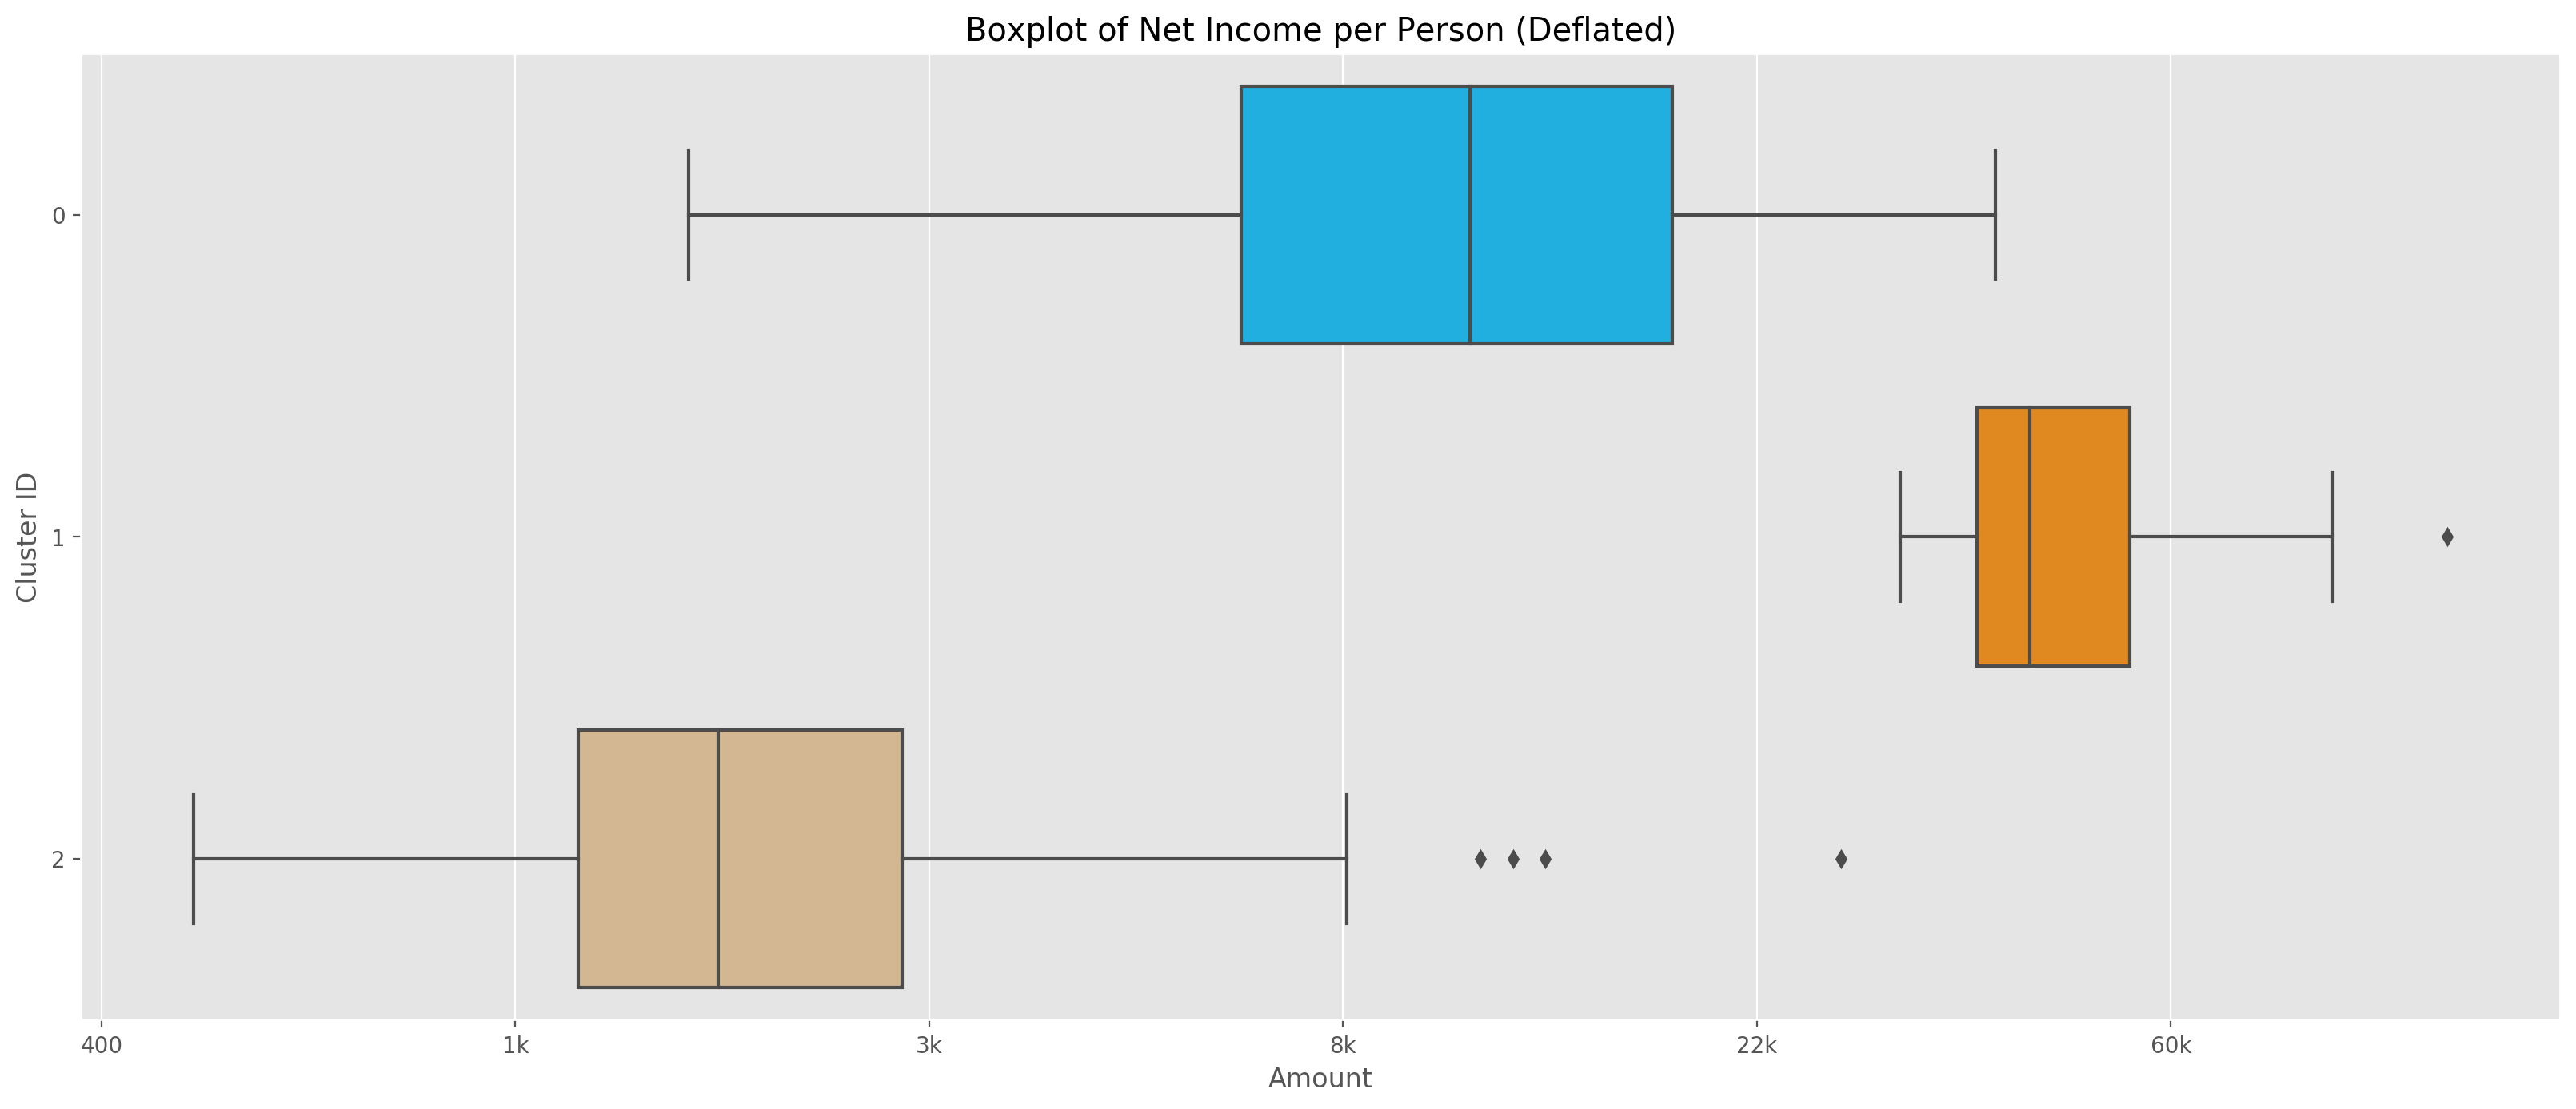

In [41]:
fig,ax = plt.subplots(figsize=(20,8),dpi=200)

inc = np.log(data_new_features["income_deflated"].values)
sns.boxplot(x=inc,y=data_new_features["km_cluster_id"].values,orient="h",
            palette=["deepskyblue","darkorange","burlywood"])

ax.set_title("Boxplot of Net Income per Person (Deflated)")
ax.set_ylabel("Cluster ID")
ax.set_xlabel("Amount")
ax.set_xticklabels(["150","400","1k","3k","8k","22k","60k","163k"])

fig.show()

**Note that the boxplot has been created on a logarithmic scale due to huge spread between the values.**

**2. `Mortality Risk`**

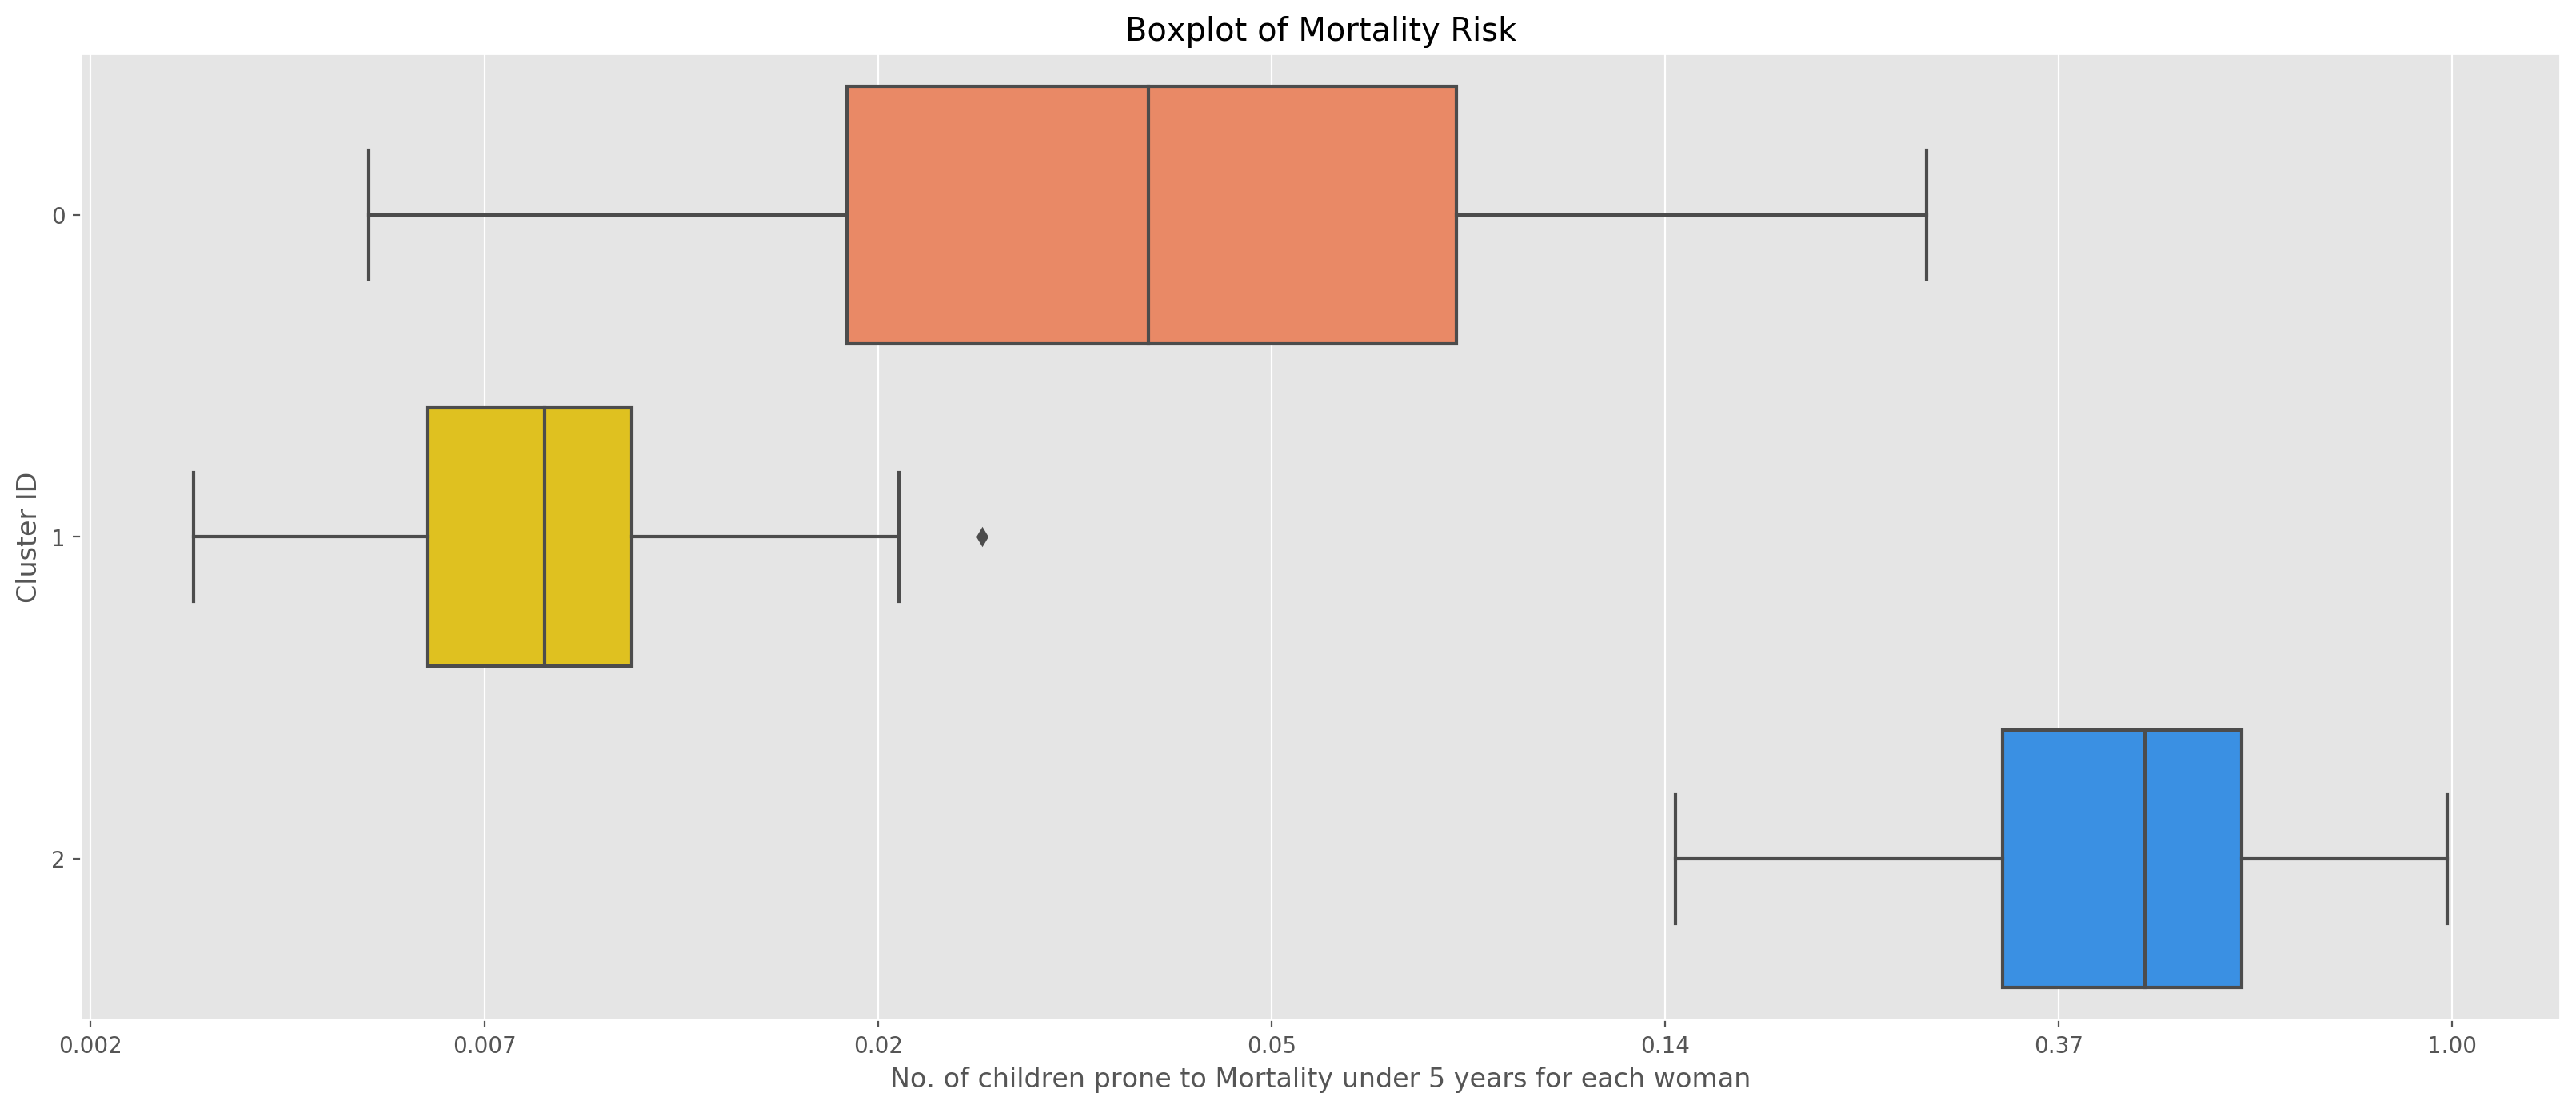

In [42]:
fig,ax = plt.subplots(figsize=(20,8),dpi=200)

mort = np.log(data_new_features["mort_risk"].values)
sns.boxplot(x=mort,y=data_new_features["km_cluster_id"].values,orient="h",
            palette=["coral","gold","dodgerblue"])

ax.set_title("Boxplot of Mortality Risk")
ax.set_ylabel("Cluster ID")
ax.set_xlabel("No. of children prone to Mortality under 5 years for each woman")
ax.set_xticklabels(["0.001","0.002","0.007","0.02","0.05","0.14","0.37","1.00","2.71"])

fig.show()

**Note that the boxplot has been created on a logarithmic scale due to huge spread between the values.**

**3. `Health Expenditure`**

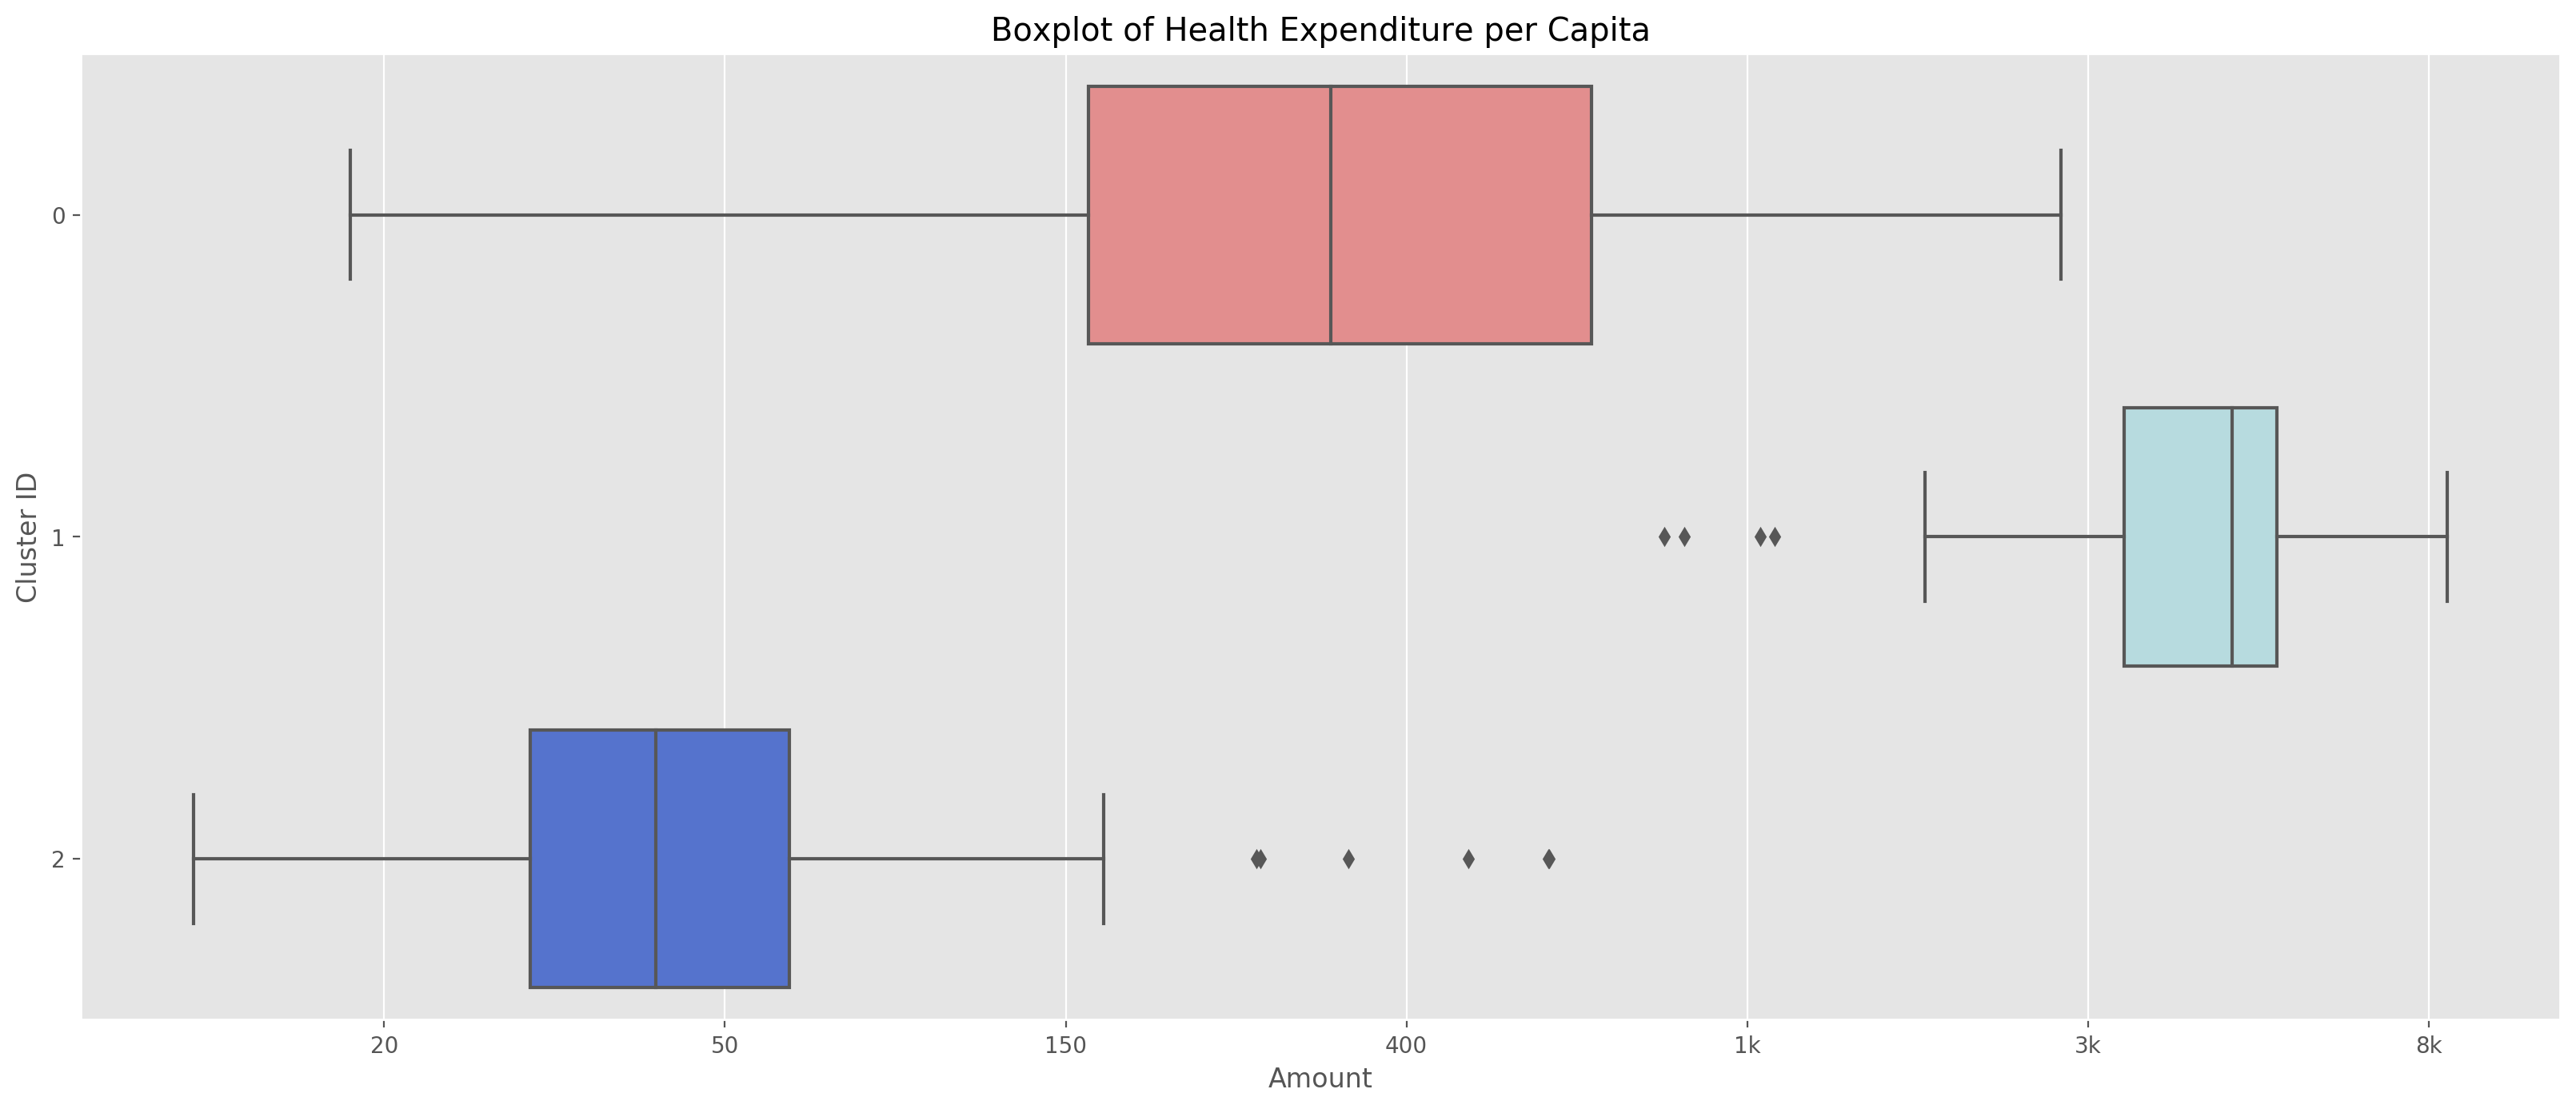

In [43]:
fig,ax = plt.subplots(figsize=(20,8),dpi=200)

health = np.log(data_new_features["health_exp"].values)
sns.boxplot(x=health,y=data_new_features["km_cluster_id"].values,orient="h",
            palette=["lightcoral","powderblue","royalblue"])

ax.set_title("Boxplot of Health Expenditure per Capita")
ax.set_ylabel("Cluster ID")
ax.set_xlabel("Amount")
ax.set_xticklabels(["10","20","50","150","400","1k","3k","8k","22k"])

fig.show()

**Note that the boxplot has been created on a logarithmic scale due to huge spread between the values.**

**4. `Life Expectancy`**

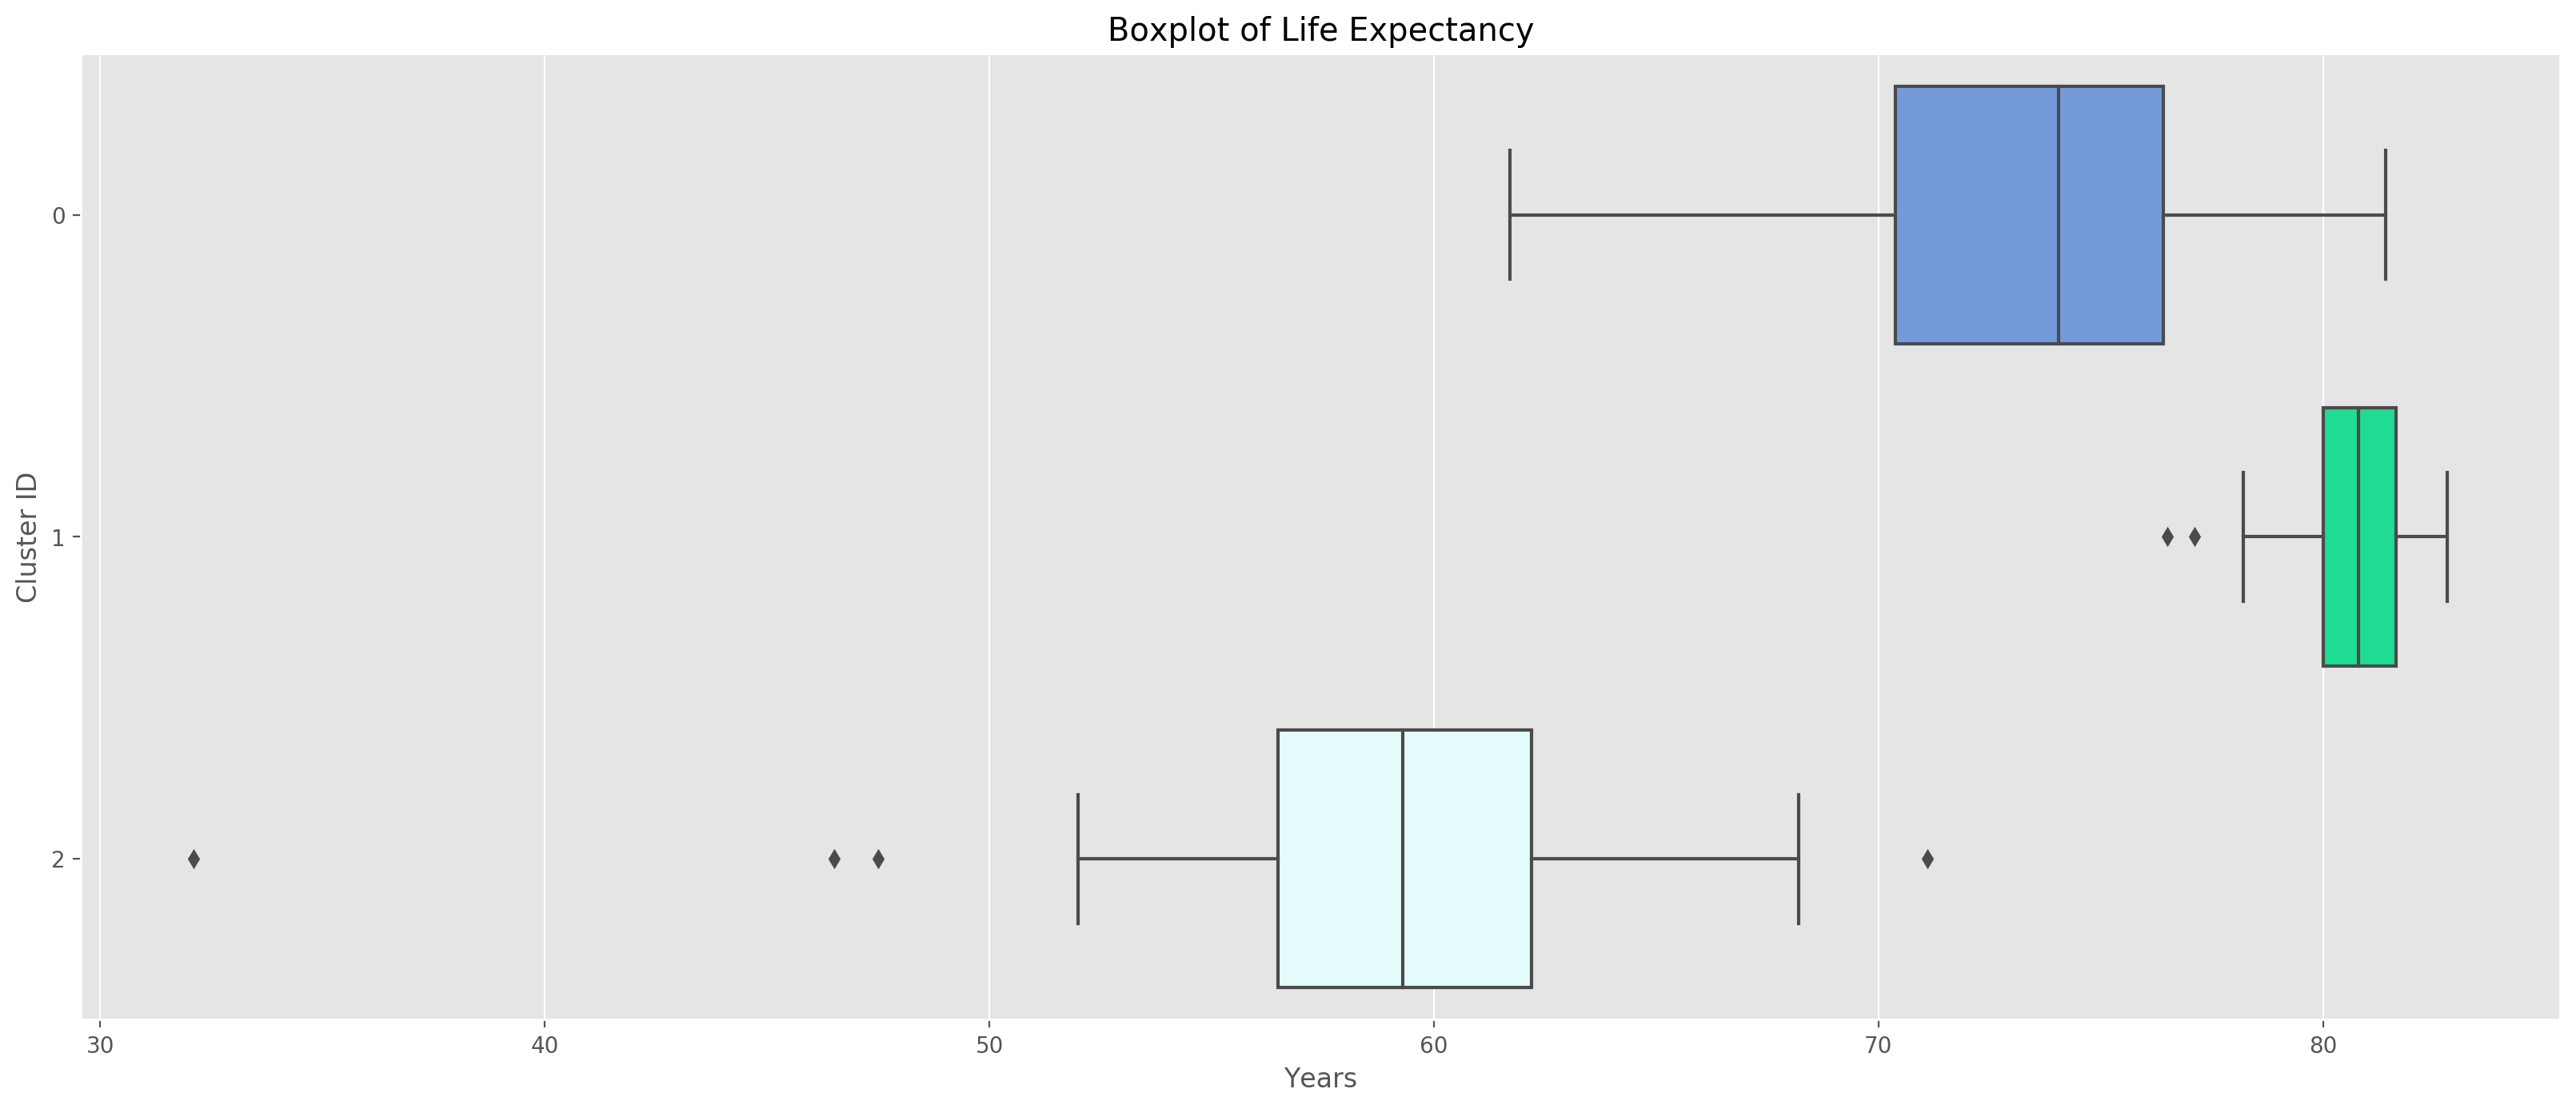

In [44]:
fig,ax = plt.subplots(figsize=(20,8),dpi=200)

life = (data_new_features["life_expec"].values)
sns.boxplot(x=life,y=data_new_features["km_cluster_id"].values,orient="h",
            palette=["cornflowerblue","mediumspringgreen","lightcyan"])

ax.set_title("Boxplot of Life Expectancy")
ax.set_ylabel("Cluster ID")
ax.set_xlabel("Years")

fig.show()

**<span style = "color:green">From the above results, we can conclude that the model has done a decent job in clustering the countries into 3 clusters. The following are the characteristics of each cluster:</span>**


-**<span style = "color:green"> `Cluster 0`: Medium Net Income and Consumption per Capita, medium Mortality Risk, medium Health Expenditure per Capita and medium Life Expectancy. Hence, can be classified as `Middle Income Countries`.</span>**


-**<span style = "color:green"> `Cluster 1`: High Net Income and Consumption per Capita, low Mortality Risk, High Health Expenditure per Capita and high Life Expectancy. Hence, can be classified as `High Income Countries`.</span>**


-**<span style = "color:green"> `Cluster 2`: Low Net Income and Consumption per Capita, high Mortality Risk, low Health Expenditure per Capita and low Life Expectancy. Hence, can be classified as `Low Income Countries`.</span>**

**Creating a new column classifying the countries as stated above:**

In [45]:
def classify(x):
    if x == 0:
        return "Middle"
    elif x == 1:
        return "High"
    else:
        return "Low"

data_new_features["km_cluster"] = data_new_features["km_cluster_id"].apply(classify)

## Clustering using the Hierarchical Clustering

**Hierarchical Clustering using Single Linkages**

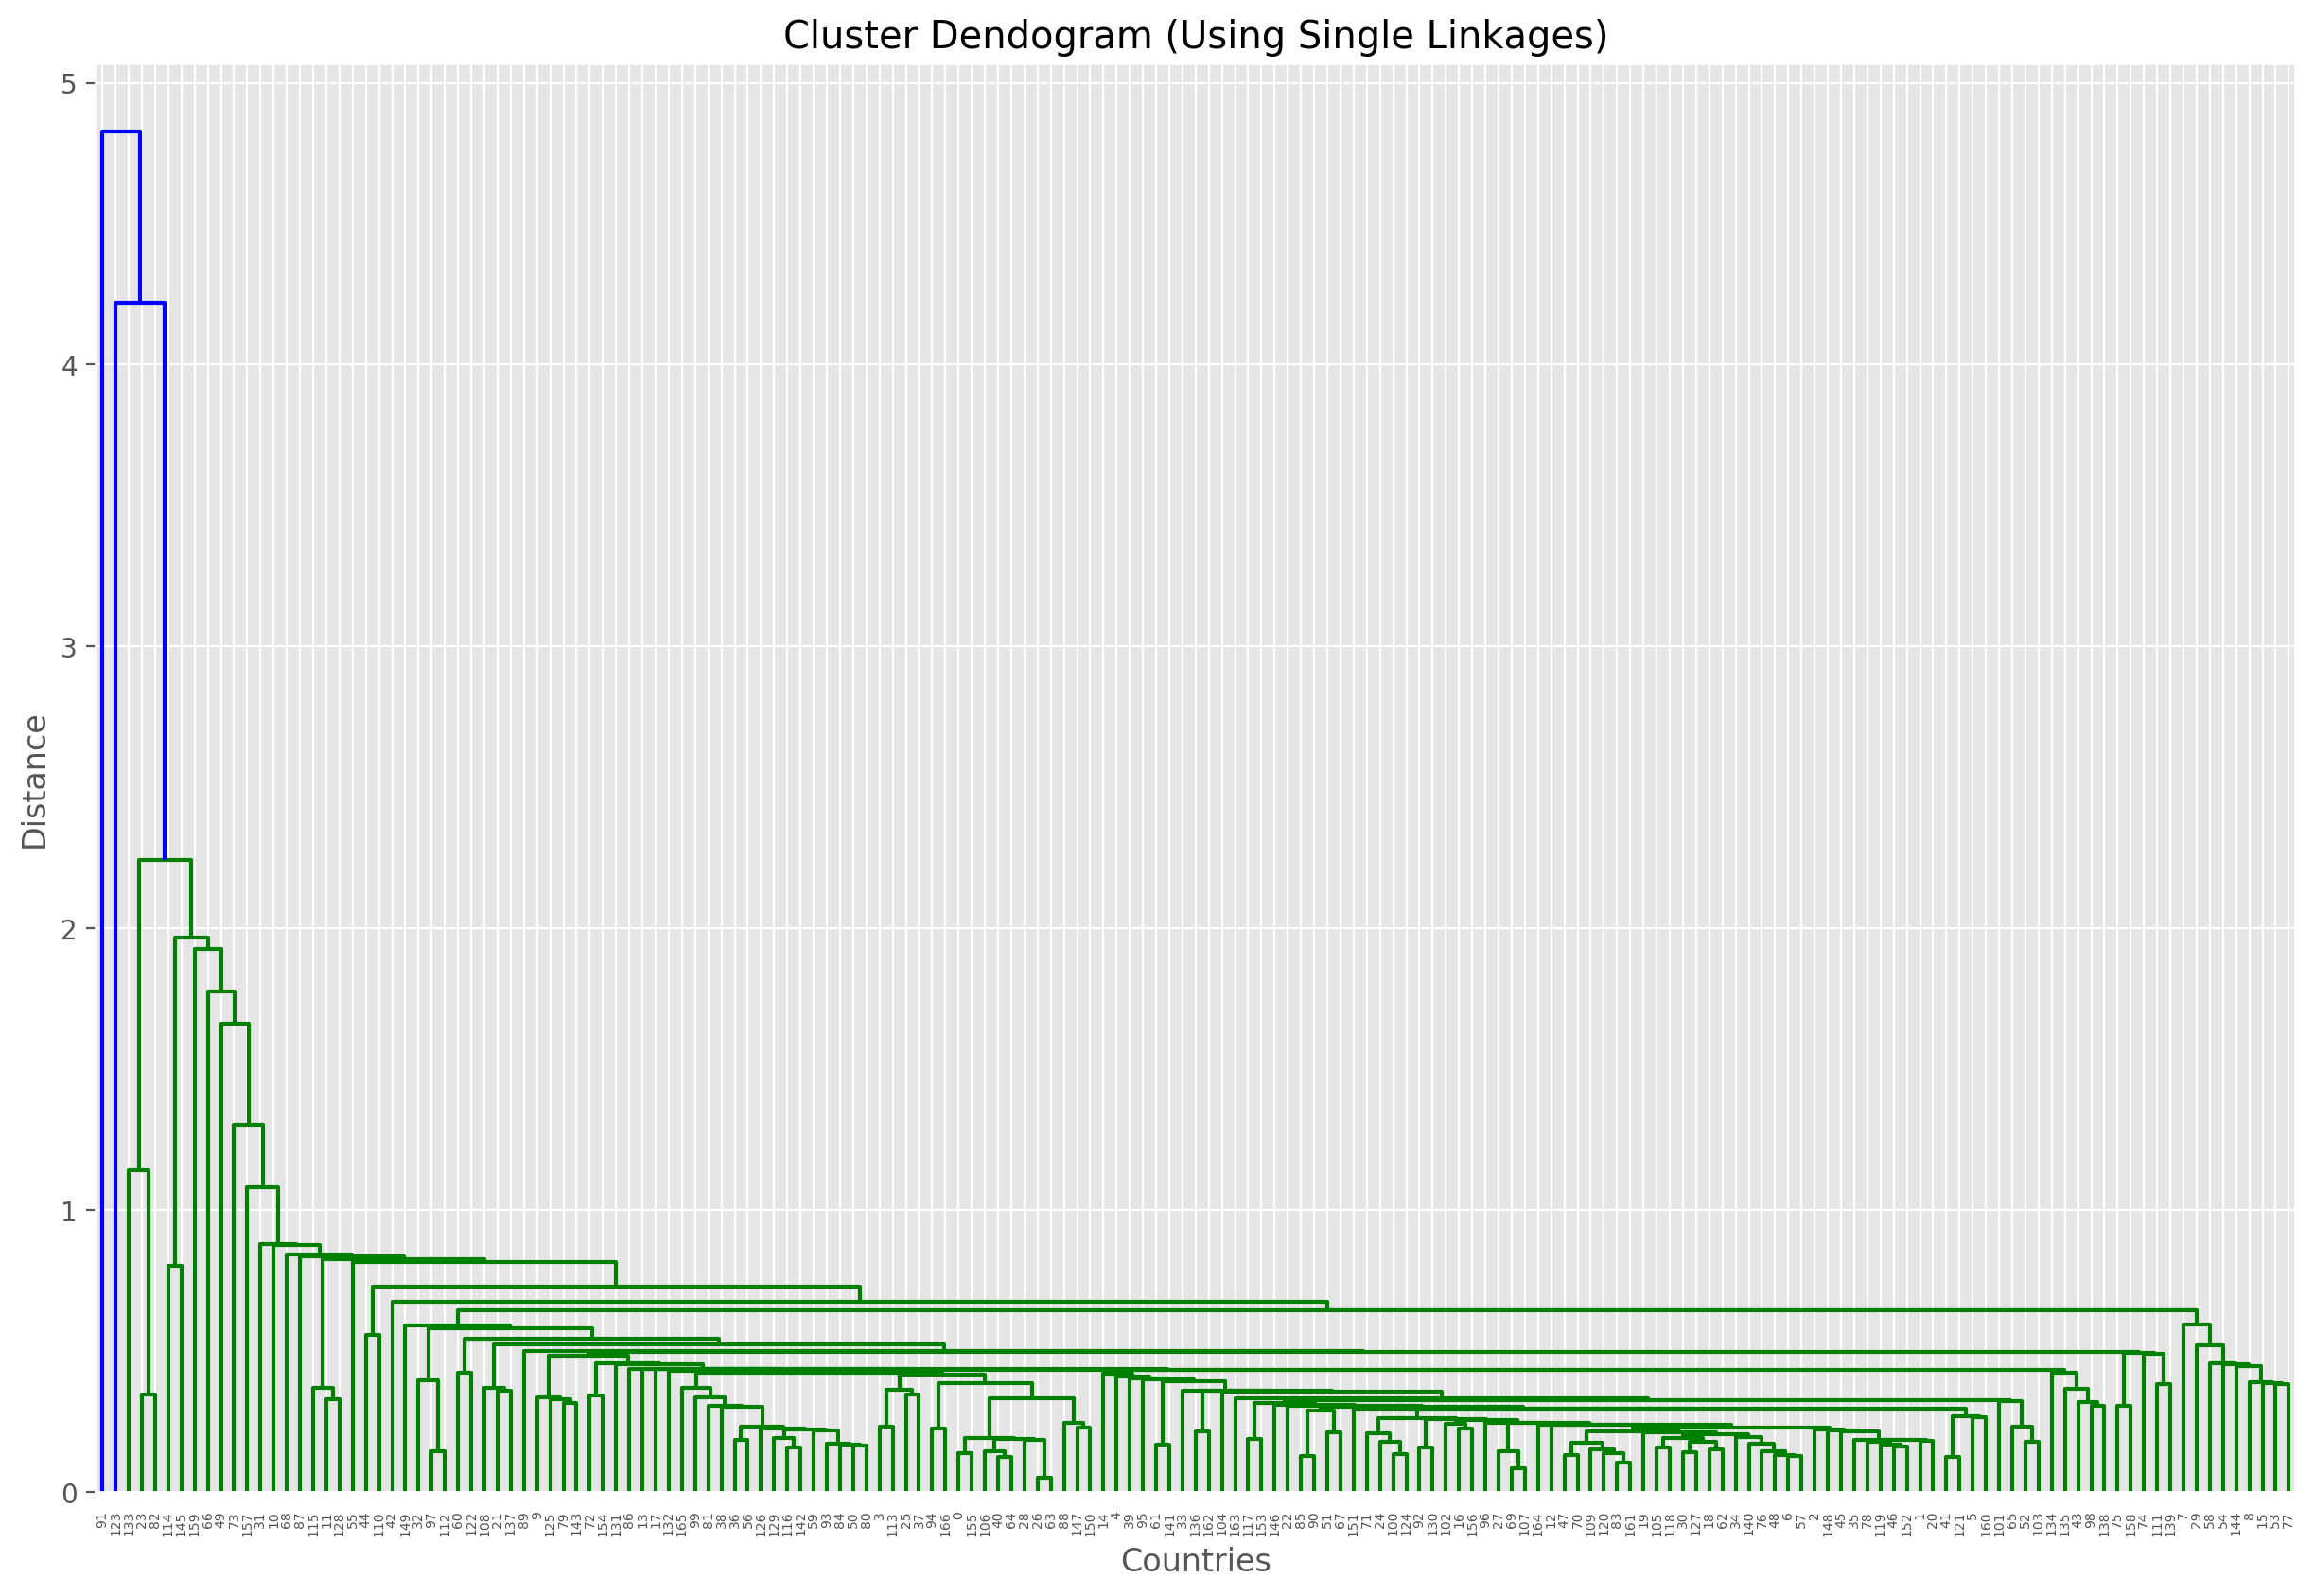

In [46]:
fig,ax = plt.subplots(figsize=(15,10),dpi=200)

mergings = linkage(data_scaled, method="single", metric='euclidean')
dendrogram(mergings)

ax.set_xlabel("Countries")
ax.set_ylabel("Distance")
ax.set_title("Cluster Dendogram (Using Single Linkages)")

fig.show()

**Hierarchical Clustering using Complete Linkages**

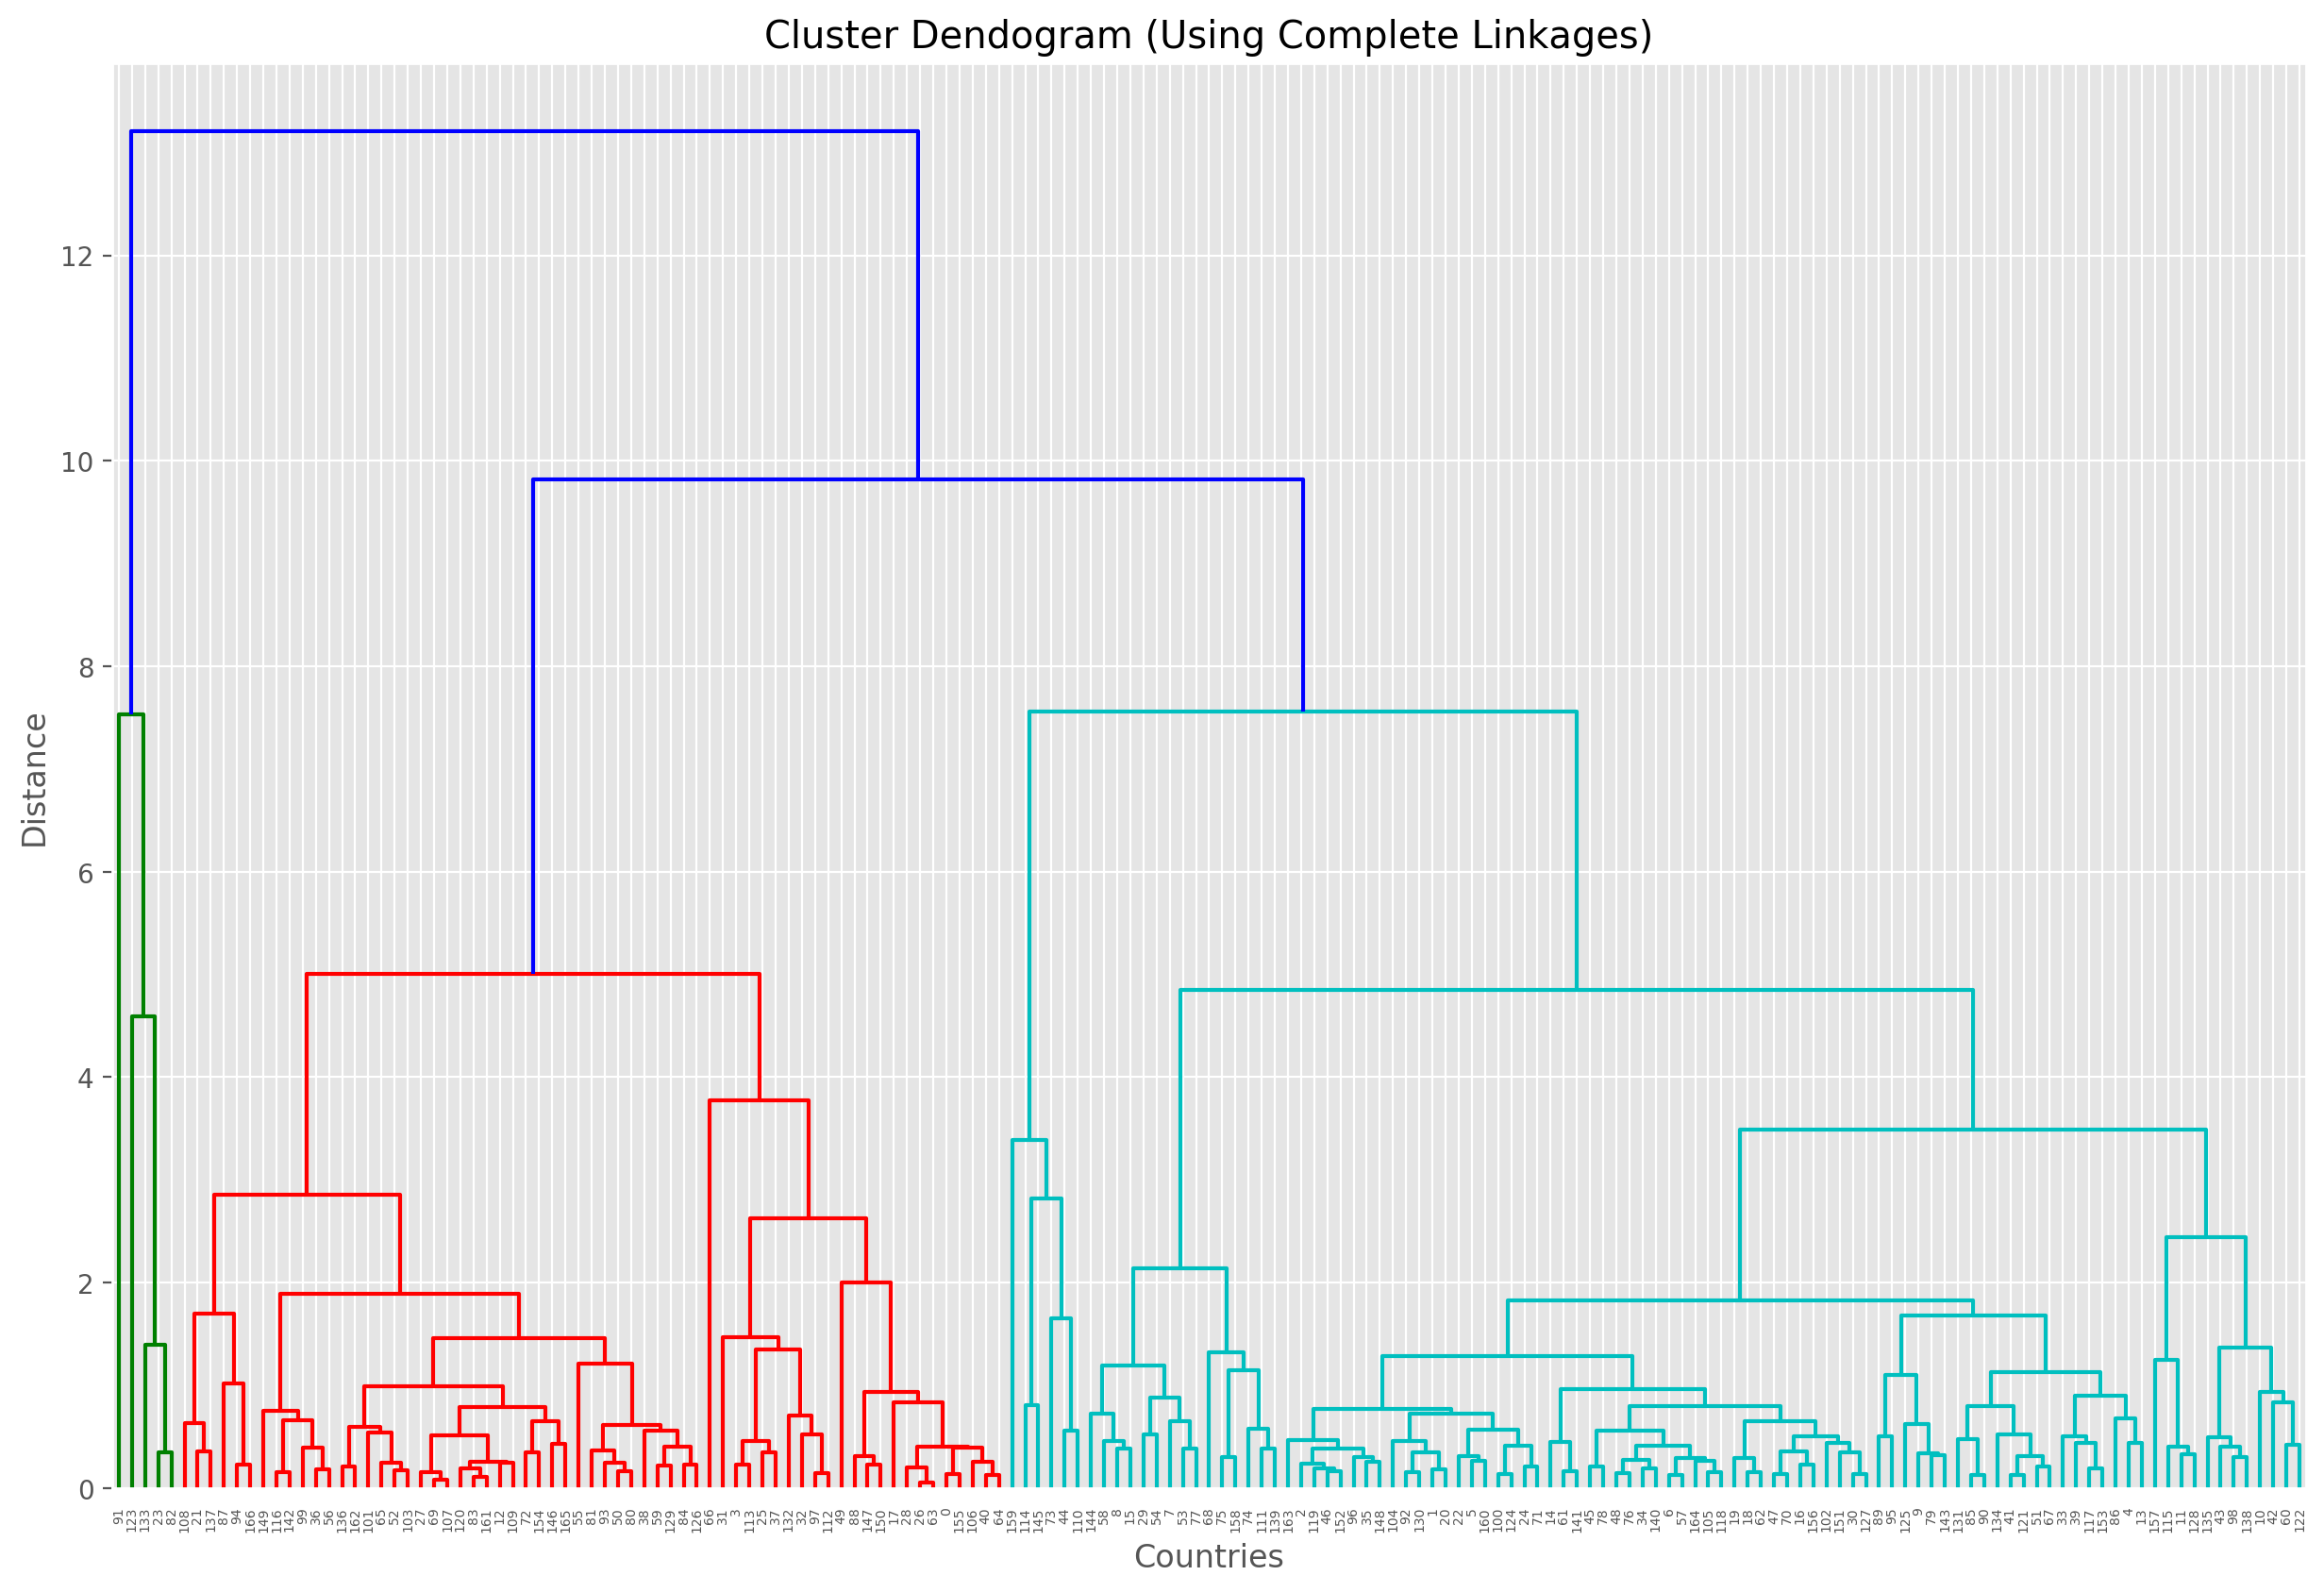

In [47]:
fig,ax = plt.subplots(figsize=(15,10),dpi=200)

mergings = linkage(data_scaled, method="complete", metric='euclidean')
dendrogram(mergings)

ax.set_xlabel("Countries")
ax.set_ylabel("Distance")
ax.set_title("Cluster Dendogram (Using Complete Linkages)")

fig.show()

**<span style = "color:green">Upon observing both the models derived using single and complete linkages, we can understand that the model derived using the complete linkages has done a better job in classifying the countries at a granular level. But this model would only be beneficial if we are conducting an in-depth analysis and we intend to form multiple clusters to understand the characteristics of each cluster of countries in detail.</span>**

**<span style = "color:green">Also, since the expectation for this case study is to identify the countries which are in dire need of financial aid, we can observe that the K-means algorithm has done a decent job in clustering the countries on a high-level.</span>**

**<span style = "color:green">Hence, it is preferred to go ahead with the K-means algorithm.</span>**

## Identifying 5 Countries requiring Immediate Help

In [48]:
low_inc_countries = data_new_features[data_new_features["km_cluster"]=="Low"]

low_inc_countries.head()

,country,income_deflated,total_consumption,net_exports,health_exp,mort_risk,life_expec,km_cluster_id,km_cluster
0,Afghanistan,1471.125731,643.347588,-176.349598,38.301718,0.524964,56.2,2,Low
3,Angola,4820.261438,2242.299837,559.493464,82.193627,0.733040,60.1,2,Low
17,Benin,1804.034296,821.226149,-100.680973,30.805372,0.594960,61.8,2,Low
21,Botswana,12210.796915,5794.987147,-448.907455,483.887257,0.151200,57.1,2,Low
25,Burkina Faso,1338.825953,558.042318,-55.987267,36.284056,0.680920,57.9,2,Low


**Sorting the countries on the basis of the following variables and identifying 5 countries which require immediate help**

In [49]:
low_inc_countries.sort_values(by=["income_deflated","total_consumption",
                                  "mort_risk","health_exp","life_expec"],
                              ascending=[True,True,False,True,True]).head()

,country,income_deflated,total_consumption,net_exports,health_exp,mort_risk,life_expec,km_cluster_id,km_cluster
37,"Congo, Dem. Rep.",504.139073,278.121358,-23.501656,21.870364,0.758640,57.5,2,Low
88,Liberia,663.695838,501.335925,-227.879966,36.584811,0.448286,60.8,2,Low
26,Burundi,680.320570,244.123598,-62.285663,23.861086,0.585936,57.7,2,Low
112,Niger,793.759142,413.120624,-91.284252,17.510288,0.921270,58.8,2,Low
106,Mozambique,852.842809,426.201319,-57.221293,20.280472,0.561560,54.5,2,Low


**<span style = "color:green">Hence, the above 5 countries are in the direst need of financial aid and require immediate help.</span>**